<div class="alert alert-block alert-info">
<center> <h1> MACHINE LEARNING MDSAA-BA </h1> </center> <br>
<center> NEWLAND PROJECT 2020/2021 </center>

**GROUP 12:** <br>
- Ana Paulino (20170743) <br>
- Luís Almeida (20200666) <br>
- Soraia Cunha (20170806)

**Table of Contents** <br>
* [1. Import](#import)
    * [1.1. Import Libraries](#importlibraries)
    * [1.2. Import Datasets](#importdatasets)
* [2. Initial Analysis](#initialanalysis)
* [3. Definition of the initial Metric and Non-metric Features](#defeatures)
* [4. Impute Missing Values on Non-Metric Features](#imputeMV)
* [5. Further Analysis](#FurtherAnalysis)
* [6. Variables' Distribution](#VarsDistribution)
    * [6.1. Categorical Variables - Histograms](#CatVarDist)
    * [6.2. Numeric Variables - Histograms](#NumVarDist)
    * [6.3. Numeric Variables - Boxplots](#NumVarBox)
* [7. Coherence Checking](#Check)
* [8. Transform Variables](#TransformVar)
* [9. Coherence Checking - Age](#CheckAge)
* [10. Outlier Removal](#outlier)
    * [10.1. Outlier Removal - Defining Features](#outdefeatures)
    * [10.2. Variables' Histograms](#hist)
    * [10.3. Outlier Removal - Filtering](#outfiltering)
         * [10.3.1. Filters 1 - Manual](#manual)
         * [10.3.2. Filters 2 - IQR](#iqr)
         * [10.3.3. Filters 3 - Manual & IQR](#manualiqr)
* [11. Variables' Values - Proportion](#varval) 
* [12. Encoding - OneHotEncoder](#encoding) 
* [13. Standardization](#standardization) 
    * [13.1. Standard Scaler](#standard)
    * [13.2. MinMax Scaler](#minmax)
* [14. Input Variables and Target Split](#inputtarget)     
* [15. Feature Selection](#featureselection) 
    * [15.1. Correlation's: Pearson and Spearman](#corr)
    * [15.2. Recursive Feature Elimination - RFE](#rfe)
    * [15.3. LASSO Regression](#lasso)
    * [15.4. RIDGE Regression](#ridge)
    * [15.5. Chi-Square](#chisquare)
    * [15.6. Principal Components Analysis - PCA](#pca)
    * [15.7. ANOVA F-Values](#anova)
    * [15.8. Feature Importances - Tree Based Classifiers](#featimportance)
    * [15.9. Gini Importance | Entropy Importance](#ginientropy)
    * [15.10. MAE | MSE | FRIEDMAN Importances](#maemsefriedman)
    * [15.11. AdaBoost Feature Importances](#adaboost)
* [16. Final Selected Features](#selectedfeatures)   
    * [16.1. Split into X (Input variables) and y (Target)](#xy)
* [17. Re-sampling Techniques for Imbalanced Classification](#resampling)
    * [17.1. Undersampling](#under)
    * [17.2. Oversampling](#over)
    * [17.3. Undersampling & Oversampling (Combined)](#combined)
    * [17.4. SMOTE - Synthetic Minority Oversampling Technique](#smote)
    * [17.5. ADASYN - Adaptive Synthetic Oversampling](#adasyn)    
* [18. Train Test Split](#traintestsplit)  
* [19. Models](#models)
    * [19.1. K-Fold and Repeated K-Fold parameters](#kfoldrkfold)
    * [19.2. Multi-Layer Perceptron](#nn)
         * [19.2.1. Grid Search NN](#gridsearchnn)
    * [19.3. Random Forest](#rf)   
    * [19.4. Logistic Regression](#log) 
    * [19.5. Instance Based Learning](#ibl)
    * [19.6. Decision Trees](#dt)
    * [19.7. Naive Bayes](#nb)
    * [19.8. Support Vector Machine - SVC (Classifier)](#svm)
    * [19.9. Ridge Classifier](#ridgeclassifier)
    * [19.10. Ensemble Methods](#ensemble)
         * [19.10.1. Balanced Bagging Classifier](#bagg)
         * [19.10.2. Balanced Bagging Classifier + Trees](#baggtrees)
         * [19.10.3. AdaBoost Classifier](#adaboostclassifier)
         * [19.10.4. Stacking Classifier](#stacking)
         * [19.10.5. Voting Classifier](#voting)
         * [19.10.6. Gradient Boosting Classifier](#gradientboost)
* [20. Models Comparison](#modelscomparison)
    * [20.1. Accuracies](#acc)
    * [20.2. ROC Curve](#roc)
* [21. Final Model - Kaggle Submission](#kaggle)

<hr>
<a class="anchor" id="import">
    
# 1. Import
    
</a>

<a class="anchor" id="importlibraries">

## 1.1. Import Libraries

</a>

In [5]:
#Loading libraries
import pandas as pd
#from pandas_profiling import ProfileReport

import numpy as np

import scipy as sp
from scipy.stats import spearmanr

import seaborn as sns

import math

from datetime import datetime
import calendar

import matplotlib
import matplotlib.pyplot as plt

import os

import sklearn
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import LeaveOneOut
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
#import mglearn

from itertools import product

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Seeting seaborn style
sns.set()

<a class="anchor" id="importdatasets">

## 1.1. Import Datasets

</a>

In [6]:
c_ya_train = pd.read_excel("Train.xlsx")
c_ya_test = pd.read_excel("Test.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'Train.xlsx'

In [ ]:
c_ya_train.head()

In [ ]:
c_ya_test.head()

<hr>
<a class="anchor" id="initialanalysis">
    
# 2. Initial Analysis
    
</a>

In [ ]:
# Set CITIZEN_ID as the index for the train and test datasets
c_ya_train = c_ya_train.set_index("CITIZEN_ID")
c_ya_test=c_ya_test.set_index("CITIZEN_ID")

In [ ]:
#ProfileReport(c_ya_train,correlations={
#        "pearson": {"calculate": True},
#        "spearman": {"calculate": False},
#        "kendall": {"calculate": False},
#        "phi_k": {"calculate": False},
#        "cramers": {"calculate": False},
#    },
#)

In [ ]:
# Using .describe() get the descriptive statistics for all variables 
c_ya_train.describe(include="all")

In [ ]:
c_ya_test.describe(include="all")

In [ ]:
# Count the number of records grouped by Education Level and Income
c_ya_train.groupby(["Education Level","Income"]).count()["Name"]

<font color='darkblue'> Interesting that the Preschool education level only has value 0, in other words, all people with education level correspondent to preschool have income below the average. </font>

In [ ]:
# Check the Educational Level and corresponding Years of Education
c_ya_train.groupby(['Education Level', 'Years of Education']).count()

In [ ]:
# More information regarding c_ya_train dataset
c_ya_train.info()

In [ ]:
# More information regarding c_ya_test dataset
c_ya_test.info()

In [ ]:
# Check duplicate records
print(c_ya_train.duplicated().value_counts())
print(c_ya_test.duplicated().value_counts())

In [ ]:
# Replace the strange characters by NaN
strange_values_list = ["!","$","%","?","*","+","_","@","€"," ","{"]
c_ya_train.replace(strange_values_list,np.nan, inplace=True)

In [ ]:
# Check the Missing Values on c_ya_train dataset
c_ya_train.isna().sum()

In [ ]:
# Replace the strange characters by NaN in test dataset
c_ya_test.replace(strange_values_list,np.nan, inplace=True)

In [ ]:
# Check the Missing Values on c_ya_test dataset
c_ya_test.isna().sum()

In [ ]:
c_ya_train['Birthday'].value_counts()

In [ ]:
c_ya_train['Birthday'] = c_ya_train['Birthday'].str.replace(' February 29', ' February 28')

In [ ]:
c_ya_test['Birthday'] = c_ya_test['Birthday'].str.replace(' February 29', ' February 28')

In [ ]:
# Convert the column Birthday into Datetime64 datatype
c_ya_train['Birthday'] = pd.to_datetime(c_ya_train['Birthday'], format = ' %B %d,%Y')

c_ya_test['Birthday'] = pd.to_datetime(c_ya_test['Birthday'], format = ' %B %d,%Y')

In [ ]:
c_ya_train.isna().sum()

In [ ]:
c_ya_test.isna().sum()

<hr>
<a class="anchor" id="defeatures">
    
# 3. Definition of the initial Metric and Non-metric Features
    
</a>

In [ ]:
# Metric & Non-metric features
metric_features=["Years of Education","Working Hours per week","Money Received","Ticket Price"]
non_metric_features=["Name","Birthday","Native Continent","Marital Status","Lives with","Base Area","Education Level","Employment Sector","Role"]

<hr>
<a class="anchor" id="imputeMV">
    
# 4. Impute Missing Values Non-metric Features
    
</a>

In [ ]:
# Make a copy of the original dataset
c_ya_train_copy  = c_ya_train.copy()

In [ ]:
c_ya_test_copy=c_ya_test.copy()

In [ ]:
#Fill Missing data with mode values
modes = c_ya_train_copy[non_metric_features].mode().loc[0]
c_ya_train_copy.fillna(modes, inplace=True)
c_ya_test_copy.fillna(modes, inplace=True)

In [ ]:
# checking how many NaNs we still have
c_ya_train_copy.isna().sum()  

In [ ]:
# checking how many NaNs we still have
c_ya_test_copy.isna().sum()  

<hr>
<a class="anchor" id="FurtherAnalysis">
    
# 5. Further Analysis
    
</a>

In [ ]:
c_ya_train["Native Continent"].value_counts()

In [ ]:
c_ya_train["Birthday"].max()

In [ ]:
c_ya_train["Marital Status"].value_counts()

In [ ]:
c_ya_train["Lives with"].value_counts()

In [ ]:
c_ya_train["Money Received"].max()

In [ ]:
c_ya_train["Money Received"].value_counts()

<hr>
<a class="anchor" id="VarsDistribution">
    
# 6. Variables' Distribution
    
</a>

<a class="anchor" id="CatVarDist">

## 6.1. Categorical Variables - Histograms

</a>

In [ ]:
cat_var = c_ya_train_copy[non_metric_features].drop(columns=["Name","Birthday"])
cat_var_list = c_ya_train_copy[non_metric_features].drop(columns=["Name","Birthday"]).columns.to_list()

In [ ]:
for i in range(len(cat_var_list)):
    sns.catplot(data=c_ya_train_copy,y=cat_var_list[i],kind="count",height=8, aspect=1)
    
title = "Categorical Variables' Histograms"

plt.suptitle(title)

plt.show()

<a class="anchor" id="NumVarDist">

## 6.2. Numeric Variables - Histograms

</a>

In [ ]:
sns.set()

fig, axes = plt.subplots(2, math.ceil(len(metric_features) / 2), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), metric_features): 
    ax.hist(c_ya_train_copy[feat])
    ax.set_title(feat, y=-0.13)
    
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

<a class="anchor" id="NumVarBox">

## 6.3. Numeric Variables - Boxplots

</a>

In [ ]:
sns.set()

fig, axes = plt.subplots(2, math.ceil(len(metric_features) / 2), figsize=(20, 11))


for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(c_ya_train_copy[feat], ax=ax)
    
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

<hr>
<a class="anchor" id="Check">
    
# 7. Coherence Checking
    
</a>

In [ ]:
c_ya_train_copy.shape

In [ ]:
c_ya_train_copy['Incoherent'] = 0

In [ ]:
# we cannot have values in the money received and ticket price columns
c_ya_train_copy.loc[(c_ya_train_copy['Money Received'] != 0) & (c_ya_train_copy['Ticket Price'] != 0), 'Incoherent'] = 1

In [ ]:
c_ya_train_copy['Incoherent'].value_counts()

In [ ]:
c_ya_train_copy.shape

In [7]:
# we cannot have a person that never worked with values in working hours
c_ya_train_copy.loc[(c_ya_train_copy['Employment Sector'] == "Never Worked") & (c_ya_train_copy['Working Hours per week'] != 0), 'Incoherent'] = 1

NameError: name 'c_ya_train_copy' is not defined

In [ ]:
c_ya_train_copy['Incoherent'].value_counts()

In [ ]:
c_ya_train_copy.loc[(c_ya_train_copy['Incoherent'] == 1), 'Working Hours per week'] = 0

In [ ]:
c_ya_train_copy.loc[c_ya_train_copy['Incoherent'] == 1]

In [ ]:
c_ya_train_copy['Incoherent'] = 0

In [ ]:
c_ya_train_copy.shape

In [ ]:
# We cannot have Employment Sector as Unemployed and have more than zero as working hours per week
c_ya_train_copy.loc[(c_ya_train_copy['Employment Sector'] == "Unemployed") & (c_ya_train_copy['Working Hours per week'] > 0), 'Incoherent'] = 1

In [ ]:
c_ya_train_copy['Incoherent'].value_counts()

In [ ]:
c_ya_train_copy.loc[(c_ya_train_copy['Incoherent'] == 1), 'Working Hours per week'] = 0

In [ ]:
c_ya_train_copy.loc[c_ya_train_copy['Incoherent'] == 1]

In [ ]:
c_ya_train_copy['Incoherent'] = 0

In [ ]:
c_ya_train_copy.shape

In [ ]:
c_ya_train_copy = c_ya_train_copy.drop(columns=['Incoherent'])

<hr>
<a class="anchor" id="TransformVar">
    
# 8. Transform Variables
    
</a>

In [8]:
c_ya_train_copy.head()

NameError: name 'c_ya_train_copy' is not defined

In [ ]:
# Age - the age of the citizen represented by 2048 - year of birth

c_ya_train_copy['Age'] = (2048 - pd.DatetimeIndex(c_ya_train_copy['Birthday']).year)
c_ya_test_copy['Age'] = (2048 - pd.DatetimeIndex(c_ya_test_copy['Birthday']).year)

In [ ]:
c_ya_train_copy['Age']

In [ ]:
c_ya_test_copy['Age']

In [ ]:
# Children - if a person has children or not (binary variable)

c_ya_train_copy['Children'] = (c_ya_train_copy['Lives with'] == 'Children').astype(int)
c_ya_test_copy['Children'] = (c_ya_test_copy['Lives with'] == 'Children').astype(int)

In [ ]:
c_ya_train_copy.head()

In [ ]:
c_ya_test_copy.head()

In [ ]:
# GroupA - if the citizen belongs to Group A (volunteers)

c_ya_train_copy['GroupA'] = ((c_ya_train_copy['Money Received'] == 0) & (c_ya_train_copy['Ticket Price'] == 0)).astype(int)
c_ya_test_copy['GroupA'] = ((c_ya_test_copy['Money Received'] == 0) & (c_ya_test_copy['Ticket Price'] == 0)).astype(int)

In [9]:
c_ya_train_copy.head()

NameError: name 'c_ya_train_copy' is not defined

In [ ]:
c_ya_test_copy.head()

In [ ]:
# GroupB - if the citizen belongs to Group B (were payed to participate)
c_ya_train_copy['GroupB'] = ((c_ya_train_copy['Money Received'] > 0) & (c_ya_train_copy['Ticket Price'] == 0)).astype(int)
c_ya_test_copy['GroupB'] = ((c_ya_test_copy['Money Received'] > 0) & (c_ya_test_copy['Ticket Price'] == 0)).astype(int)

In [ ]:
c_ya_train_copy.head()

In [ ]:
c_ya_test_copy.head()

In [ ]:
# GroupC - if the citizen belongs to Group C (made a money offer)
c_ya_train_copy['GroupC'] = ((c_ya_train_copy['Money Received'] == 0) & (c_ya_train_copy['Ticket Price'] > 0)).astype(int)
c_ya_test_copy['GroupC'] = ((c_ya_test_copy['Money Received'] == 0) & (c_ya_test_copy['Ticket Price'] > 0)).astype(int)

In [ ]:
c_ya_train_copy.head()

In [ ]:
c_ya_test_copy.head()

In [ ]:
# Unemployed - binary variable that states whether a citizen is unemployed
c_ya_train_copy['Unemployed'] = (c_ya_train_copy['Employment Sector'] == 'Unemployed').astype(int)
c_ya_test_copy['Unemployed'] = (c_ya_test_copy['Employment Sector'] == 'Unemployed').astype(int)

In [ ]:
c_ya_train_copy.loc[c_ya_train_copy['Unemployed'] == 1]

In [ ]:
c_ya_test_copy.loc[c_ya_test_copy['Unemployed'] == 1]

In [ ]:
# HigherEduc - binary variable (1 - if citizen has higher education; 0 - if citizen does not have higher education)
c_ya_train_copy['HigherEduc'] = (c_ya_train_copy['Education Level'].str.contains('PhD|Masters|PostGraduation|Bachelors')).astype(int)
c_ya_test_copy['HigherEduc'] = (c_ya_test_copy['Education Level'].str.contains('PhD|Masters|PostGraduation|Bachelors')).astype(int)

In [ ]:
c_ya_train_copy.head()

In [10]:
c_ya_test_copy.head()

NameError: name 'c_ya_test_copy' is not defined

In [ ]:
c_ya_train_copy['Name'].str[:5].unique()

In [ ]:
c_ya_test_copy['Name'].str[:5].unique()

In [ ]:
# Female - dummy variable (1 - citizen is female; 0 - citizen is male)
c_ya_train_copy['Female'] = (c_ya_train_copy['Name'].str.contains('Miss|Mrs')).astype(int)
c_ya_test_copy['Female'] = (c_ya_test_copy['Name'].str.contains('Miss|Mrs')).astype(int)

In [ ]:
c_ya_train_copy.head(10)

In [ ]:
c_ya_test_copy.head(10)

In [ ]:
# Number of males(0) and females(1) in the dataset; there are more men
print(c_ya_train_copy['Female'].value_counts())

In [ ]:
# Number of males(0) and females(1) in the dataset; there are more men
print(c_ya_test_copy['Female'].value_counts())

<hr>
<a class="anchor" id="CheckAge">
    
# 9. Coherence Checking - Age
    
</a>

In [11]:
c_ya_train_copy.shape

NameError: name 'c_ya_train_copy' is not defined

In [ ]:
# we only want people with more than 17 years

In [ ]:
c_ya_train_copy.loc[c_ya_train_copy["Age"] == 17].count()

In [ ]:
c_ya_train_copy.loc[c_ya_train_copy["Age"] == 17, 'Age'] = 18

In [ ]:
c_ya_train_copy.loc[c_ya_train_copy["Age"] == 18]

In [ ]:
c_ya_train_copy.shape

<hr>
<a class="anchor" id="outlier">
    
# 10. Outlier Removal
    
</a>

<a class="anchor" id="outdefeatures">

## 10.1. Outlier Removal - Defining Features

</a>

In [ ]:
c_ya_train_copy=c_ya_train_copy.drop(columns={'Name', 'Birthday'})
c_ya_test_copy=c_ya_test_copy.drop(columns={'Name', 'Birthday'})
print(c_ya_train_copy.columns)
print(c_ya_test_copy.columns)

In [ ]:
outlier_metric_features = ["Years of Education","Working Hours per week","Money Received","Ticket Price",'Age']

In [ ]:
#needs to be updated for analysis
metric_features=["Years of Education","Working Hours per week","Money Received","Ticket Price",'Age']

binary_features=['Children', 'GroupA', 'GroupB','GroupC', 'Unemployed', 'HigherEduc', 'Female']

non_metric_features=["Native Continent","Marital Status","Lives with","Base Area","Education Level","Employment Sector",
                     "Role"]

In [ ]:
c_ya_train_copy.dtypes

<a class="anchor" id="hist">

## 10.2. Variables' Histograms

</a>

In [ ]:
sns.set()

fig, axes = plt.subplots(2, math.ceil(len(metric_features) / 2), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), metric_features): 
    ax.hist(c_ya_train_copy[feat])
    ax.set_title(feat, y=-0.13)
    
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

<a class="anchor" id="outfiltering">

## 10.3. Outlier Removal - Filtering

</a>

<hr>
<a class="anchor" id="manual">

### 10.3.1. Filters 1 - Manual
</a>

In [12]:
filters1 = (
    (c_ya_train_copy['Working Hours per week']<=84)
)

df_1 = c_ya_train_copy[filters1]
print('Percentage of data kept after removing outliers:', np.round(df_1.shape[0] / c_ya_train_copy.shape[0], 4))

NameError: name 'c_ya_train_copy' is not defined

In [ ]:
# List of the CITIZEN_ID considered as outliers
filters1[filters1 == False].index.tolist()

In [ ]:
sns.set()

fig, axes = plt.subplots(2, math.ceil(len(metric_features) / 2), figsize=(20, 11))


for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(df_1[feat], ax=ax)
    
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

<hr>
<a class="anchor" id="iqr">

### 10.3.2. Filters 2 - IQR
    
</a>

In [ ]:
q25 = c_ya_train_copy.quantile(.25)
q75 = c_ya_train_copy.quantile(.75)
iqr = (q75 - q25)



upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr



filters2 = []
for metric in outlier_metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(c_ya_train_copy[metric].between(llim, ulim, inclusive=True))


filters2 = pd.Series(np.all(filters2, 0), index=c_ya_train_copy.index)
df_2 = c_ya_train_copy[filters2]
print('Percentage of data kept after removing outliers:', np.round(df_2.shape[0] / c_ya_train_copy.shape[0], 4))

<hr>
<a class="anchor" id="manualiqr">

### 10.3.3. Filters 3 - Manual & IQR
    
</a>

- We keep the first filtering because IQR is not useful in our very sparse dataset 

In [ ]:
c_ya_train_copy = df_1

In [ ]:
c_ya_train_copy.shape

In [ ]:
# g = sns.PairGrid(c_ya_train_copy)
# g.map_diag(sns.histplot)
# g.map_offdiag(sns.scatterplot)
# g.add_legend()

<hr>
<a class="anchor" id="varval">
    
# 11. Variables' Values - Proportion
    
</a>

In [ ]:
# we droped the unecessary columns
c_ya_train_weights = c_ya_train_copy.copy()
c_ya_train_weights=c_ya_train_weights.drop(columns={"Ticket Price","Money Received"})
c_ya_train_weights.columns

In [ ]:
 def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.ylabel("$Frequency$")

   
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                         np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.ylabel("$p$")

    plt.show()  
    
for i in range(len(c_ya_train_weights.columns)):
     bar_charts_categorical(df=c_ya_train_weights,target="Income",feature=c_ya_train_weights.columns[i])

<hr>
<a class="anchor" id="encoding">
    
# 12. Encoding - OneHotEncoder
    
</a>

In [ ]:
non_metric_features

In [ ]:
# Perform the encoding with One-Hot-Encoder in the train dataset
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(np.array(c_ya_train_copy[non_metric_features]))
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=c_ya_train_copy.index, columns=ohc_feat_names)  
ohc_df

In [13]:
# Perform the encoding with One-Hot-Encoder for test dataset
ohc_test = OneHotEncoder(sparse=False, drop="first")
ohc_feat_test = ohc_test.fit_transform(np.array(c_ya_test_copy[non_metric_features]))
ohc_feat_names_test = ohc_test.get_feature_names()
ohc_df_test = pd.DataFrame(ohc_feat_test, index=c_ya_test_copy.index, columns=ohc_feat_names_test)  
ohc_df_test

NameError: name 'c_ya_test_copy' is not defined

In [ ]:
# Concatenate the encoded variables with the c_ya_train_copy dataset
c_ya_train_copy = pd.concat([c_ya_train_copy.drop(columns=non_metric_features), ohc_df], axis=1)
c_ya_train_copy.head()

In [ ]:
# Concatenate the encoded variables with the c_ya_test_copy dataset
c_ya_test_copy = pd.concat([c_ya_test_copy.drop(columns=non_metric_features), ohc_df_test], axis=1)
c_ya_test_copy.head()

<hr>
<a class="anchor" id="standardization">
    
# 13. Standardization
    
</a>

<a class="anchor" id="standard">

## 13.1. Standard Scaler

</a>

In [ ]:
# Apply the StandardScaler
scaler = StandardScaler()
scaled_feat = scaler.fit_transform(c_ya_train_copy[metric_features])
print(scaled_feat)
scaler_test = StandardScaler()
scaled_feat_test = scaler_test.fit_transform(c_ya_test_copy[metric_features])
print(scaled_feat_test)

In [ ]:
c_ya_train_copy[metric_features] = scaled_feat
c_ya_train_copy.head()

In [ ]:
c_ya_test_copy[metric_features] = scaled_feat_test
c_ya_test_copy.head()

In [ ]:
# Checking mean and variance of standardized variables
c_ya_train_copy[metric_features].describe().round(2)

In [14]:
c_ya_test_copy[metric_features].describe().round(2)

NameError: name 'c_ya_test_copy' is not defined

<a class="anchor" id="minmax">

## 13.2. MinMax Scaler

</a>

In [ ]:
# scaler = MinMaxScaler()
# scaled_feat = scaler.fit_transform(c_ya_train_copy[metric_features])
# scaled_feat
# scaler_test = MinMaxScaler()
# scaled_feat_test = scaler_test.fit_transform(c_ya_test_copy[metric_features])
# scaled_feat_test

In [ ]:
# print("Parameters fitted:\n", scaler.data_min_, "\n", scaler.data_max_)

In [ ]:
# c_ya_train_copy[metric_features] = scaled_feat
# c_ya_train_copy.head()

In [ ]:
# c_ya_test_copy[metric_features] = scaled_feat_test
# c_ya_test_copy.head()

In [ ]:
# #Checking max and min of minmaxed variables
# c_ya_train_copy[metric_features].describe().round(2)

In [15]:
# c_ya_test_copy[metric_features].describe().round(2)

<hr>
<a class="anchor" id="inputtarget">
    
# 14. Input Variables and Target Split
    
</a>

In [16]:
target = c_ya_train_copy["Income"]
target

NameError: name 'c_ya_train_copy' is not defined

In [ ]:
data = c_ya_train_copy.loc[:, c_ya_train_copy.columns != 'Income']
data

<hr>
<a class="anchor" id="featureselection">
    
# 15. Feature Selection
    
</a>

<a class="anchor" id="corr">

## 15.1. Correlation's: Pearson and Spearman

</a>

In [ ]:
enconding_variables =data.columns[data.columns.str.startswith('x')]

data_1 = data.drop(columns=enconding_variables)
data_1

In [ ]:
# Compute the correlation matrix - Pearson
corr = data_1.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = 'RdBu', vmax = 1, vmin=-1, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

<font color='darkblue'>If we consider a treshold of |0.70| for Pearson correlation, we have:</font> <br>
- Either we have 'Group C' or 'Ticket Price'
- Either we have 'Years of Education' or 'HigherEduc'
- We should look and discuss both variables 'Group A' and 'Group B'

In [ ]:
# Compute the correlation matrix - Spearman
corr = data_1.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = 'RdBu', vmax = 1, vmin=-1, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

<font color='darkblue'>If we consider a treshold of |0.70| for Spearman correlation, we have:</font> <br>
- Either we have 'Group C' or 'Ticket Price'
- Either we have 'Group B' or 'Money Received'
- Either we have 'Years of Education' or 'HigherEduc'
- Either we have 'Group A' or 'Money Received'
- Either we have 'Group A' or 'Group B' <br>

**Conclusion:** <br>
We should keep 'Ticket Price', 'Money Received', 'Years of Education'

In [ ]:
data_1.dtypes

**Check the correlation of the variables chosen from Pearson correlation matrix**

In [ ]:
# Keep the variables from Pearson Correlation Matrix
PearsonData = data_1.drop(columns = ['GroupB', 'GroupC', 'HigherEduc']) 

In [ ]:
PearsonData.head()

In [ ]:
# Compute the correlation matrix
corr = PearsonData.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = 'RdBu', vmax = 1, vmin=-1, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

**Check the correlation of the variables chosen from Spearman correlation matrix**

In [ ]:
# Keep the variables from Spearman Correlation Matrix
SpearmanData = data_1.drop(columns = ['GroupA', 'GroupB', 'GroupC', 'HigherEduc']) 

In [ ]:
SpearmanData.head()

In [ ]:
# Compute the correlation matrix
corr = SpearmanData.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = 'RdBu', vmax = 1, vmin=-1, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

<a class="anchor" id="rfe">

## 15.2. Recursive Feature Elimination - RFE

</a>

In [ ]:
data.head()

In [ ]:
model = LogisticRegression()

In [17]:
rfe = RFE(estimator = model)

NameError: name 'model' is not defined

In [ ]:
X_rfe = rfe.fit_transform(X = data[metric_features], y = target) 

In [ ]:
model.fit(X = X_rfe,y = target)

In [ ]:
rfe.support_

In [ ]:
rfe.ranking_

In [ ]:
selected_features = pd.Series(rfe.support_, index = metric_features)
selected_features[selected_features==True]

In [ ]:
#no of features
nof_list=np.arange(1,6)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(data[metric_features], target, test_size = 0.3, random_state = 0)
    
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

<a class="anchor" id="lasso">

## 15.3. LASSO Regression

</a>

In [ ]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,20))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [ ]:
reg = LassoCV()

In [ ]:
reg.fit(X=data, y=target)

In [ ]:
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)

In [ ]:
print("Best score using built-in LassoCV: %f" %reg.score(X = data, y = target))

In [ ]:
coef = pd.Series(reg.coef_, index = data.columns)

In [18]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

NameError: name 'coef' is not defined

In [ ]:
coef.sort_values().tail(20)

In [ ]:
plot_importance(coef,'Lasso')

<a class="anchor" id="ridge">

## 15.4. RIDGE Regression

</a>

In [ ]:
ridge = RidgeCV()

In [ ]:
ridge.fit(X = data, y = target)

In [ ]:
print("Best alpha using built-in RidgeCV: %f" % ridge.alpha_)

In [ ]:
print("Best score using built-in RidgeCV: %f" %ridge.score(data, target))

In [ ]:
coef_ridge = pd.Series(ridge.coef_, index = data.columns)
coef_ridge.sort_values().tail(20)

In [ ]:
plot_importance(coef_ridge,'Ridge')

<a class="anchor" id="chisquare">

## 15.5. Chi-Square

</a>

In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
binary_features

In [ ]:
encoded = data.columns[data.columns.str.startswith('x')].tolist()
encoded

In [ ]:
chi_features = ['x0_America',
 'x0_Asia',
 'x0_Europe',
 'x0_Oceania',
 'x1_Married',
 'x1_Married - Spouse Missing',
 'x1_Married - Spouse in the Army',
 'x1_Separated',
 'x1_Single',
 'x1_Widow',
 'x2_Children',
 'x2_Husband',
 'x2_Other Family',
 'x2_Other relatives',
 'x2_Wife',
 'x3_Aerilon',
 'x3_Alverton',
 'x3_Aroonshire',
 'x3_Auchenshuggle',
 'x3_Bellenau',
 'x3_Bellmoral',
 'x3_Butterpond',
 'x3_Carlisle',
 'x3_Cherrytown',
 'x3_Conriston',
 'x3_Drumchapel',
 'x3_Eelry',
 'x3_Fanfoss',
 "x3_Fool's March",
 'x3_Ironforge',
 'x3_Kald',
 "x3_King's Watch",
 'x3_Kirkwall',
 "x3_Knife's Edge",
 'x3_Laenteglos',
 'x3_Laewaes',
 'x3_Lanercost',
 'x3_Lewes',
 'x3_Marnmouth',
 'x3_Mensfield',
 'x3_Middlesbrough',
 'x3_MillerVille',
 'x3_Northbury',
 'x3_Orilon',
 'x3_Pran',
 'x3_Redwick Bush',
 'x3_Sharnwick',
 'x3_Sharpton',
 'x3_Tranmere',
 'x3_Watford',
 'x3_Wigston',
 'x3_Willesden',
 'x3_Woodpine',
 'x4_Bachelors + PostGraduation',
 'x4_High School + PostGraduation',
 'x4_High School - 1st Cycle',
 'x4_High School - 2nd Cycle',
 'x4_High School Complete',
 'x4_Masters',
 'x4_Masters + PostGraduation',
 'x4_Middle School - 1st Cycle',
 'x4_Middle School - 2nd Cycle',
 'x4_Middle School Complete',
 'x4_PhD',
 'x4_Preschool',
 'x4_Primary School',
 'x4_Professional School',
 'x4_Professional School + PostGraduation',
 'x5_Private Sector - Others',
 'x5_Private Sector - Services ',
 'x5_Public Sector - Government',
 'x5_Public Sector - Others',
 'x5_Self-Employed (Company)',
 'x5_Self-Employed (Individual)',
 'x5_Unemployed',
 'x6_Agriculture and Fishing',
 'x6_Army',
 'x6_Cleaners & Handlers',
 'x6_Household Services',
 'x6_IT',
 'x6_Machine Operators & Inspectors',
 'x6_Management',
 'x6_Other services',
 'x6_Professor',
 'x6_Repair & constructions',
 'x6_Sales',
 'x6_Security',
 'x6_Transports', 'Children',
 'GroupA',
 'GroupB',
 'GroupC',
 'Unemployed',
 'HigherEduc',
 'Female']
chi_features

In [ ]:
chi_scores = chi2(data[chi_features], target)
chi_scores

In [ ]:
p_values = pd.Series(chi_scores[1],index = chi_features)
p_values.sort_values(ascending = False , inplace = True)

In [19]:
plt.figure(figsize=(20,10))
p_values.plot.bar()

NameError: name 'p_values' is not defined

<Figure size 2000x1000 with 0 Axes>

In [ ]:
chi2_features=SelectKBest(chi2,k=10)
best_features=chi2_features.fit_transform(data[chi_features],target)
cols=chi2_features.get_support(indices=True)
features_to_keep=data.iloc[:,cols]
features_to_keep.columns

<a class="anchor" id="pca">

## 15.6. Principal Components Analysis - PCA

</a>

In [ ]:
df_pca = data.copy()

In [ ]:
pca = PCA()
pca_feat = pca.fit_transform(df_pca[metric_features])
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)  

In [ ]:
pca_df

In [ ]:
# Output PCA table
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [ ]:
df_pca = pd.concat([df_pca, pca_df], axis=1)
df_pca.head()

In [ ]:
def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: red'
    elif val > 0.45:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Interpreting each Principal Component
loadings = df_pca[metric_features + pca_feat_names].corr().loc[metric_features, pca_feat_names]
loadings.style.applymap(_color_red_or_green)

**Correlation between selected features**

In [ ]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(data, 15))

<a class="anchor" id="anova">

## 15.7. ANOVA F-Values

</a>

*Input Variable* -> Numerical; *Output Variable* -> Categorical <br>

The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different. Then, the algorithm selects features according to the k highest scores.

In [20]:
# Create an SelectKBest object to select features with best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif)

# Apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(data, target)

NameError: name 'data' is not defined

In [ ]:
# Show results
print('Original number of features:', data.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

In [ ]:
anova_coef = pd.Series(fvalue_selector.scores_, index = X_kbest.columns)
anova_coef

In [ ]:
# Get columns to keep and create new dataframe with those only
cols = fvalue_selector.get_support(indices=True)
features_to_keep = data.iloc[:,cols]
features_to_keep.columns

### Candidates to be the Selected variables

In [178]:
feature_variables=["x1_Married","Age","Years of Education","Money Received","Ticket Price","Working Hours per week",
                       'x6_Management', 'x2_Husband','GroupB','x2_Wife','GroupC','HigherEduc','x5_Public Sector - Others']

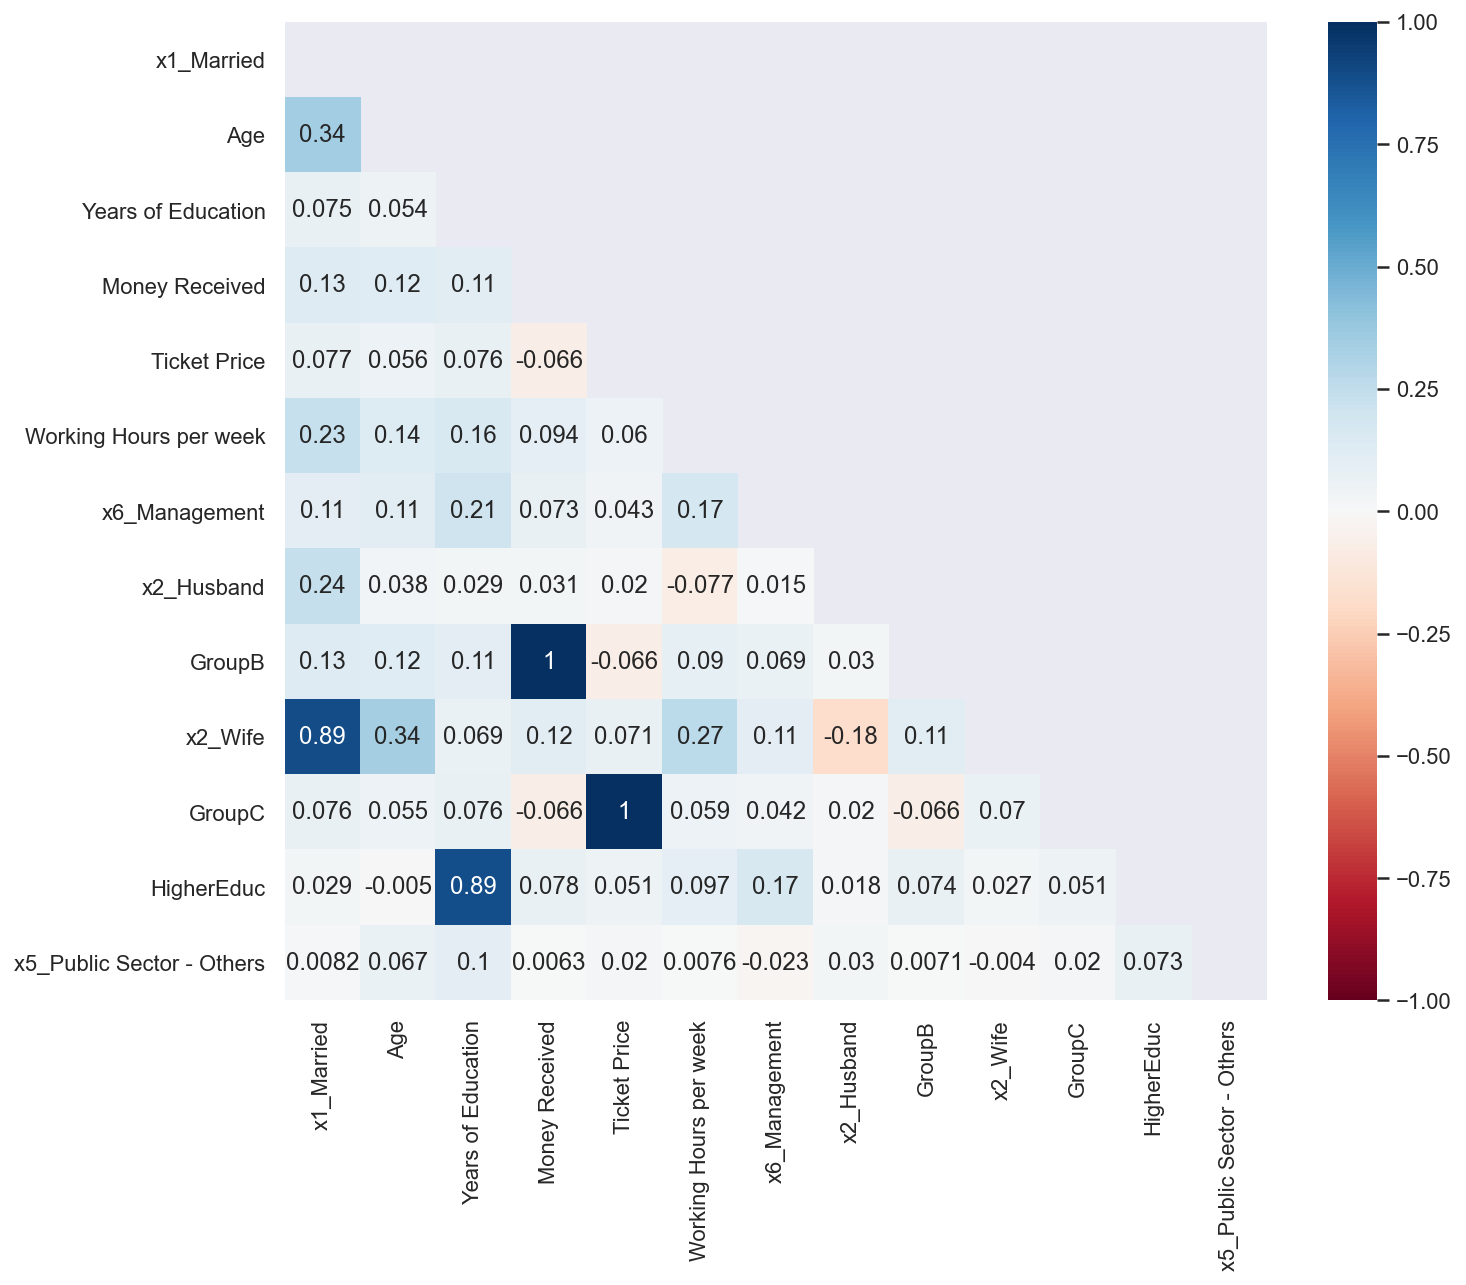

In [179]:
f, ax = plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(data[feature_variables].corr(method="spearman"), dtype=bool))
sns.heatmap(data[feature_variables].corr(method="spearman"),annot=True,mask=mask, vmin=-1, vmax=1, cmap = 'RdBu')

**Higher correlations**
- Money received and groupB(x)
- Ticket price and groupC(x)
- Years of Education and HigherEduc(x)
- Ticket Price and GroupC(x)

<a class="anchor" id="featimportance">

## 15.8. Feature Importances - Tree based Classifiers

</a>

[3.20158765e-02 1.26256231e-01 3.40534636e-02 1.48029712e-02
 2.36315749e-01 9.29807698e-03 3.38321109e-02 2.45025859e-02
 4.66891800e-03 7.46375459e-05 2.99303635e-02 1.60759161e-02
 1.90313647e-03 3.85659053e-03 1.22314598e-02 8.91564284e-04
 6.69241152e-02 1.68973999e-03 4.60565146e-04 2.52313788e-03
 2.73086867e-02 2.79404202e-03 9.16657806e-03 1.27876982e-02
 1.43693038e-02 2.50677212e-03 5.42328468e-02 7.07878842e-04
 1.28904078e-03 9.43898566e-04 3.64237099e-04 1.11529417e-04
 3.12659390e-04 1.67002578e-03 1.47199104e-04 2.65219823e-04
 1.40551249e-04 2.14259080e-04 1.10713573e-03 2.46260704e-03
 9.92636354e-04 1.94268781e-06 4.63943114e-04 1.93947673e-04
 7.66630698e-04 4.90854594e-04 4.85129210e-04 5.38199739e-04
 4.29204551e-04 2.66253636e-04 1.13728412e-04 1.62635634e-05
 1.95820004e-04 1.68597185e-04 6.65491750e-03 5.70840861e-04
 5.34716373e-04 1.85045266e-04 8.49695386e-04 6.43571474e-04
 3.99471845e-04 1.33801775e-03 7.80914914e-04 1.45731541e-04
 1.09050857e-05 1.385881

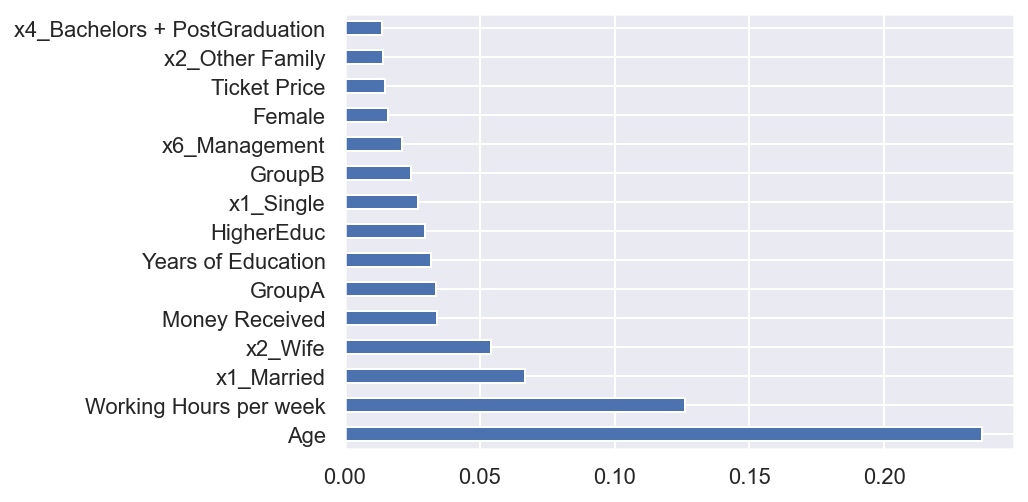

In [180]:
model = ExtraTreesClassifier()
model.fit(data, target)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=data.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

<a class="anchor" id="ginientropy">

## 15.9. Gini Importance | Entropy Importance

</a>

In [181]:
gini_importance = DecisionTreeClassifier().fit(data, target).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(data, target).feature_importances_

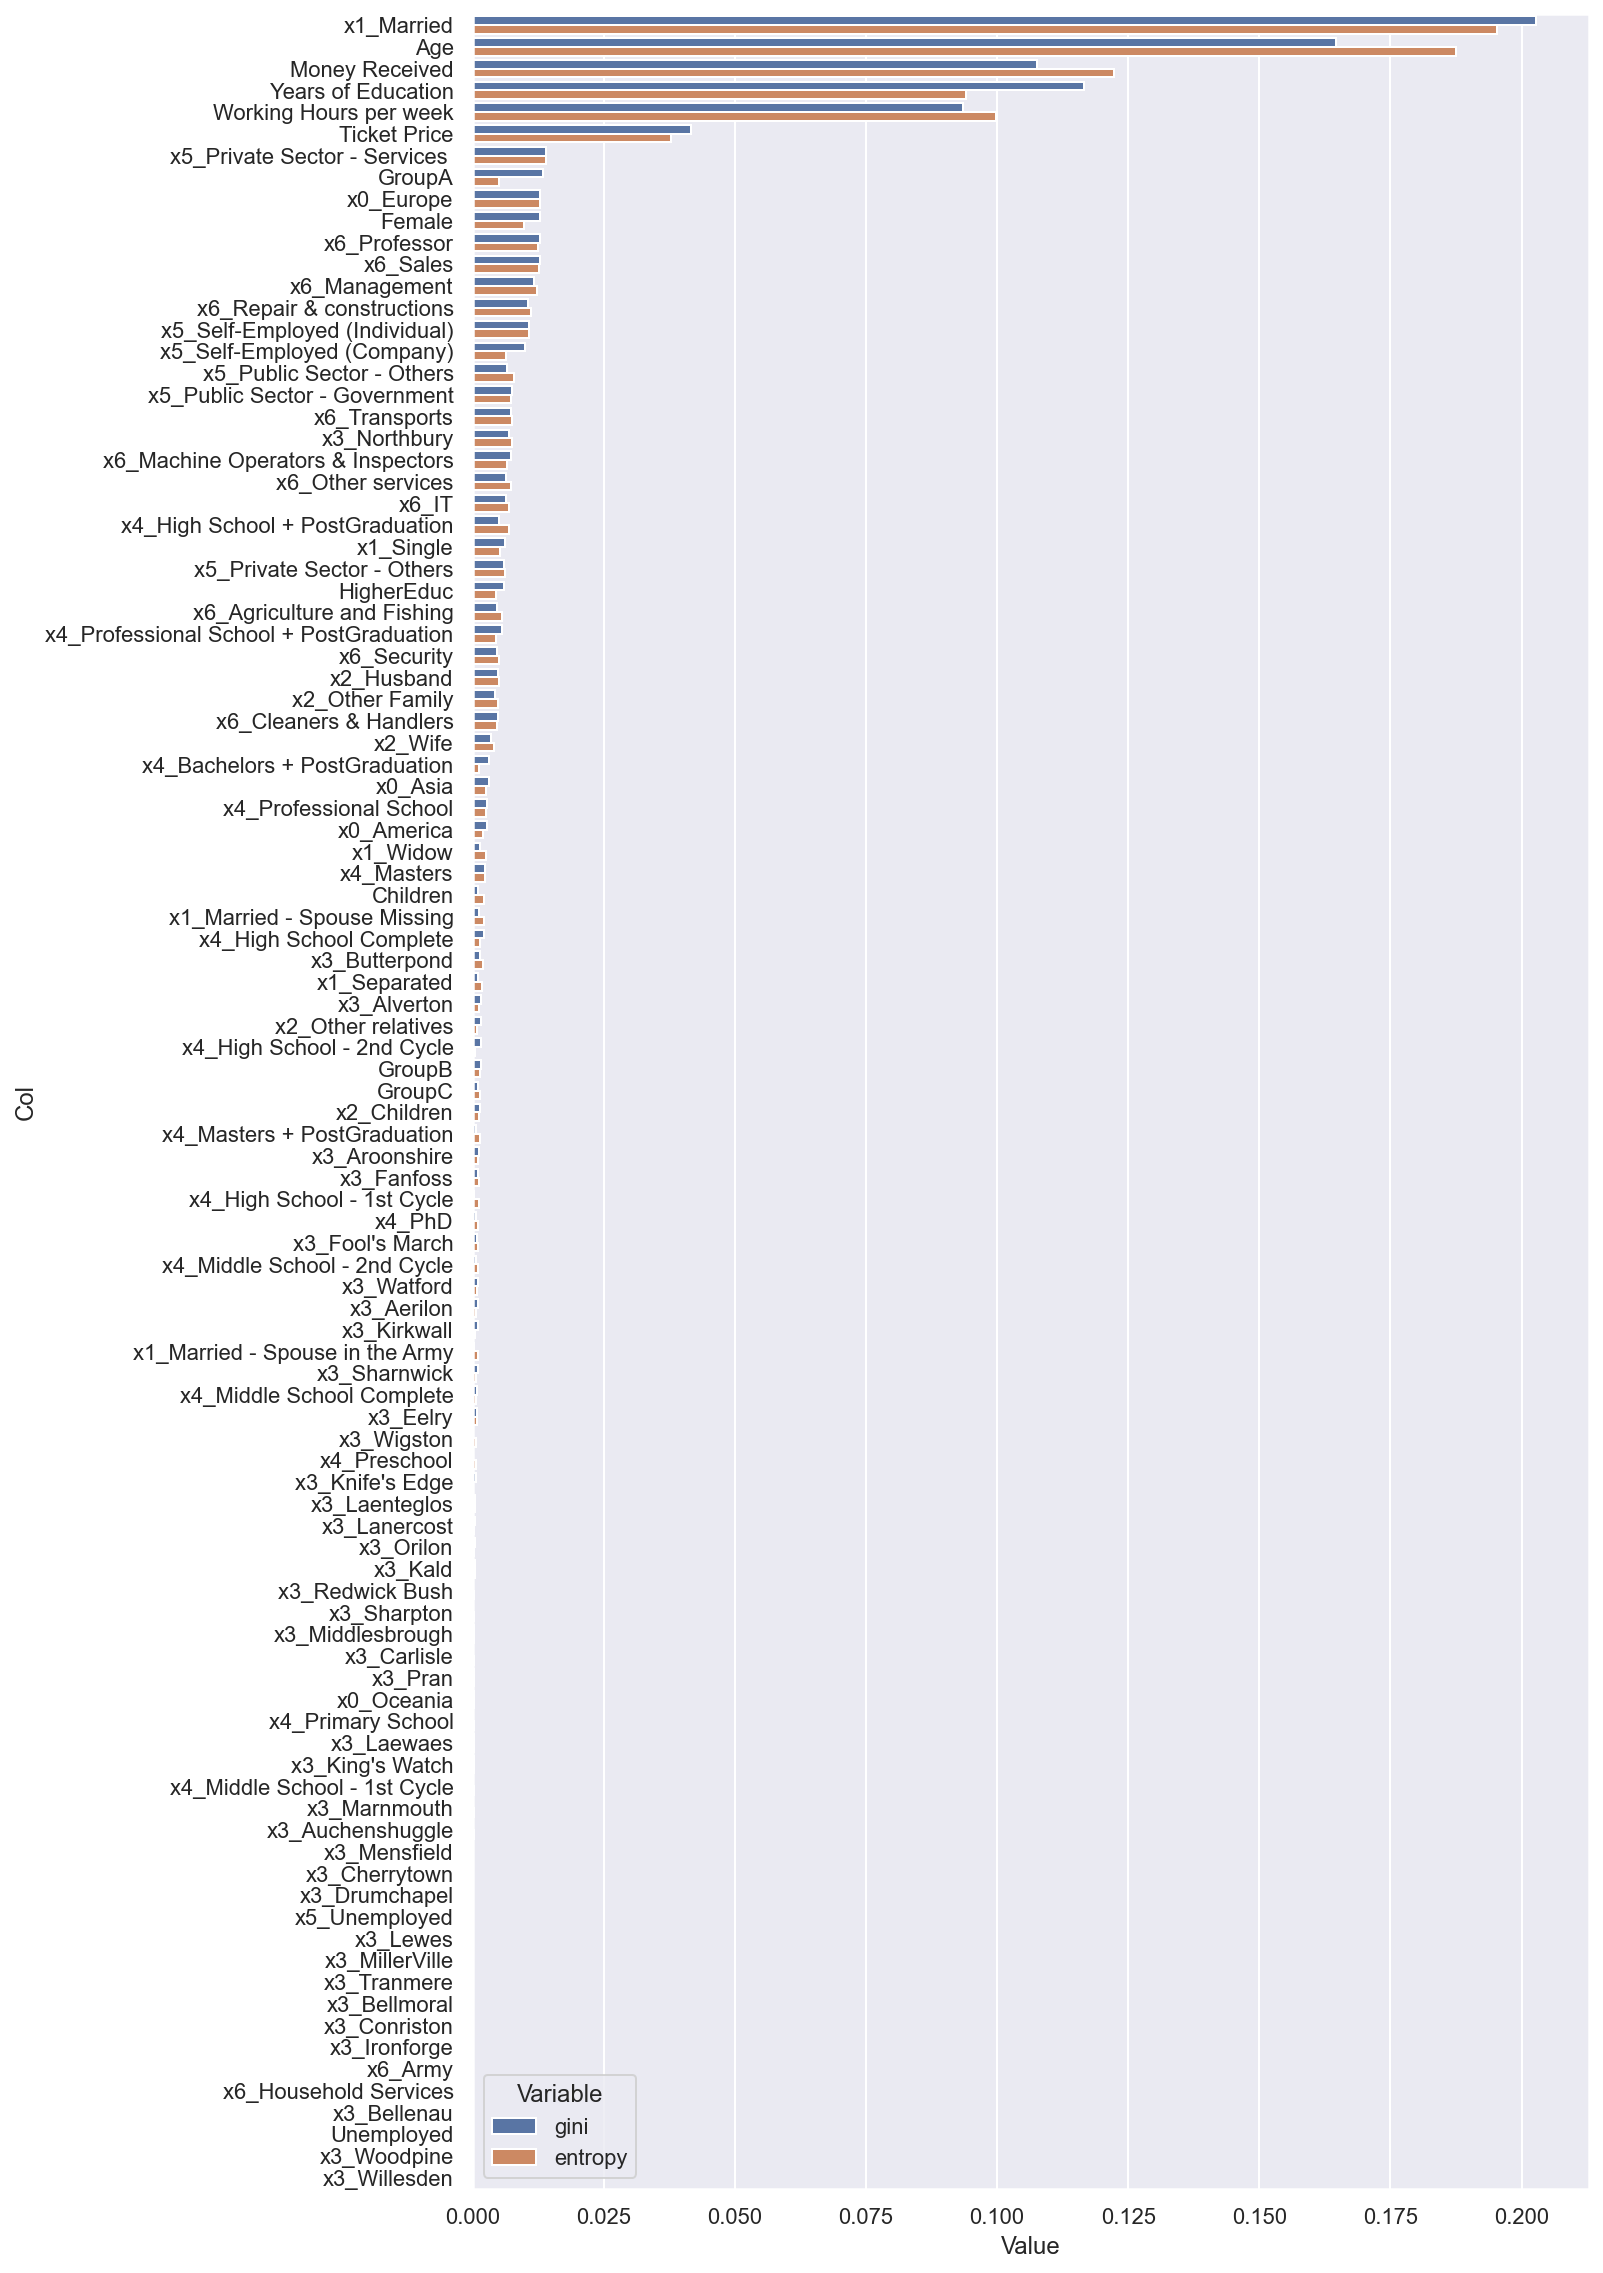

In [182]:
import seaborn as sns 

zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = data.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(10,20))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

<a class="anchor" id="maemsefriedman">

## 15.10. MAE | MSE | FRIEDMAN Importances

</a>

In [183]:
from sklearn.tree import DecisionTreeRegressor

In [184]:
mse_importance = DecisionTreeRegressor().fit(data, target).feature_importances_
mae_importance = DecisionTreeRegressor(criterion='mae').fit(data, target).feature_importances_
friedman_importance = DecisionTreeRegressor(criterion='friedman_mse').fit(data, target).feature_importances_

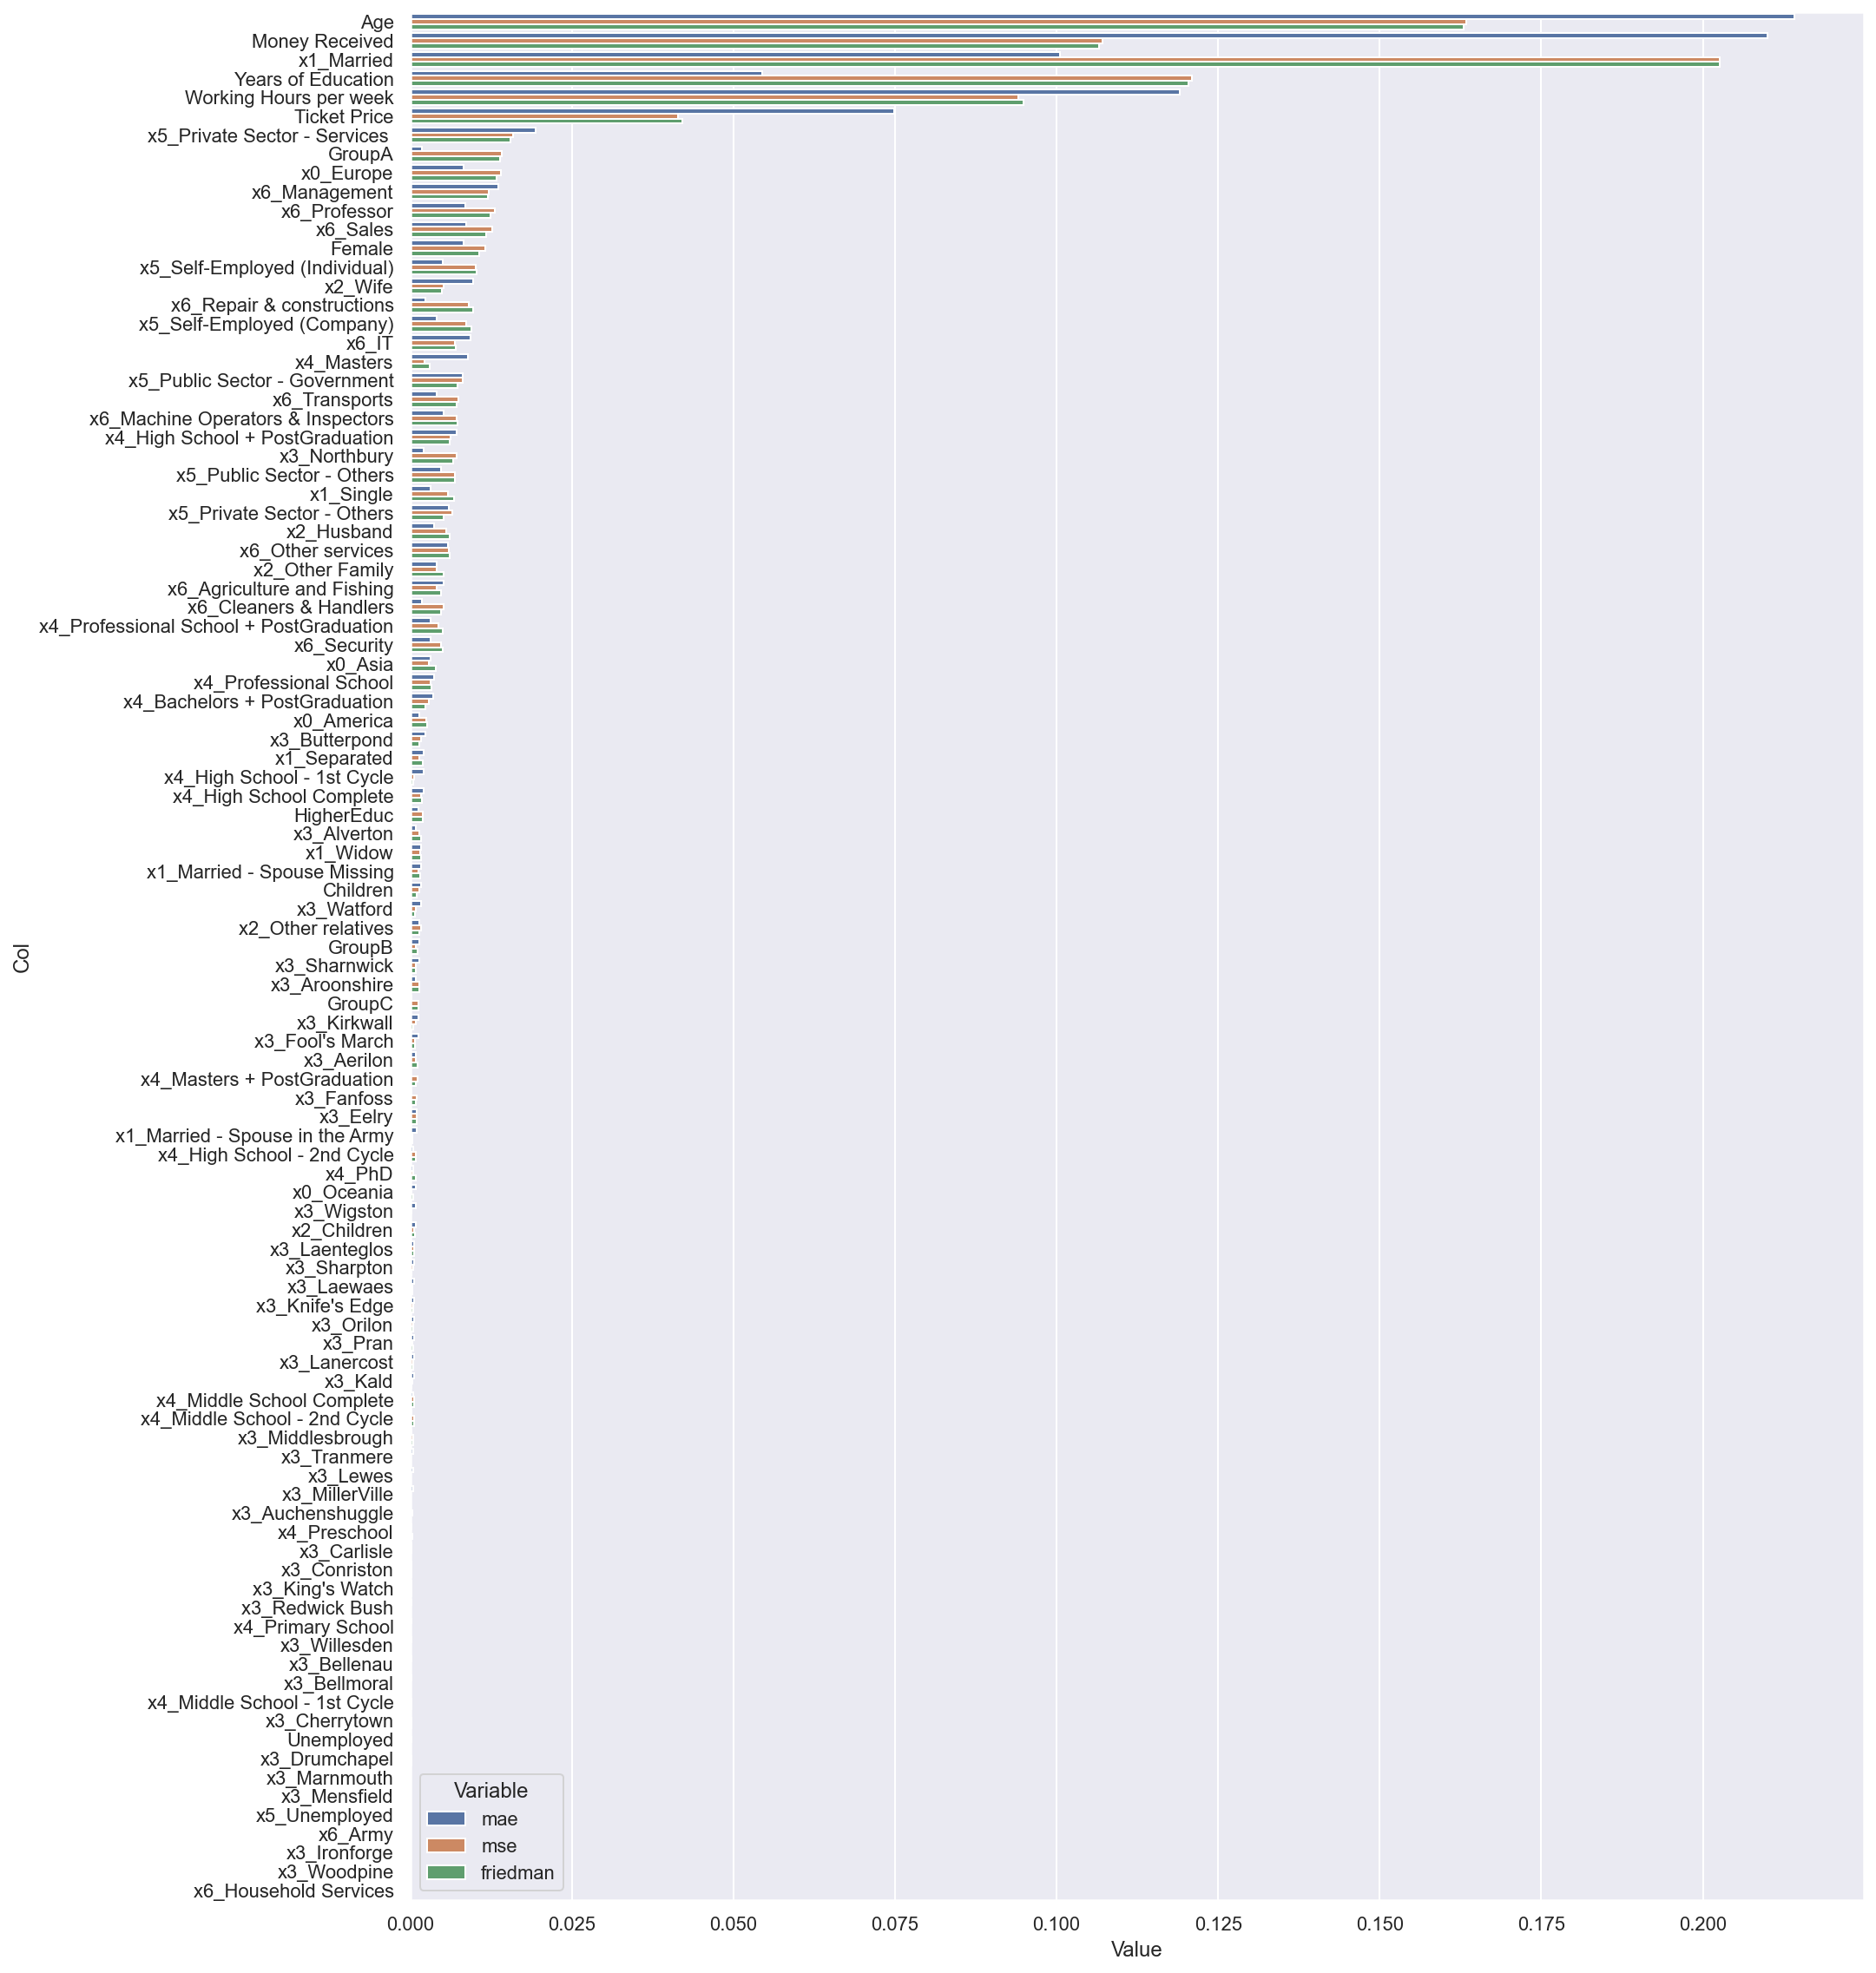

In [185]:
zippy = pd.DataFrame(zip(mse_importance, mae_importance, friedman_importance), columns = ['mse','mae','friedman'])
zippy['col'] = data.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,20))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

<a class="anchor" id="adaboost">

## 15.11. AdaBoost Feature Importances

</a>

In [186]:
ab = AdaBoostClassifier(random_state = 5).fit(data, target)

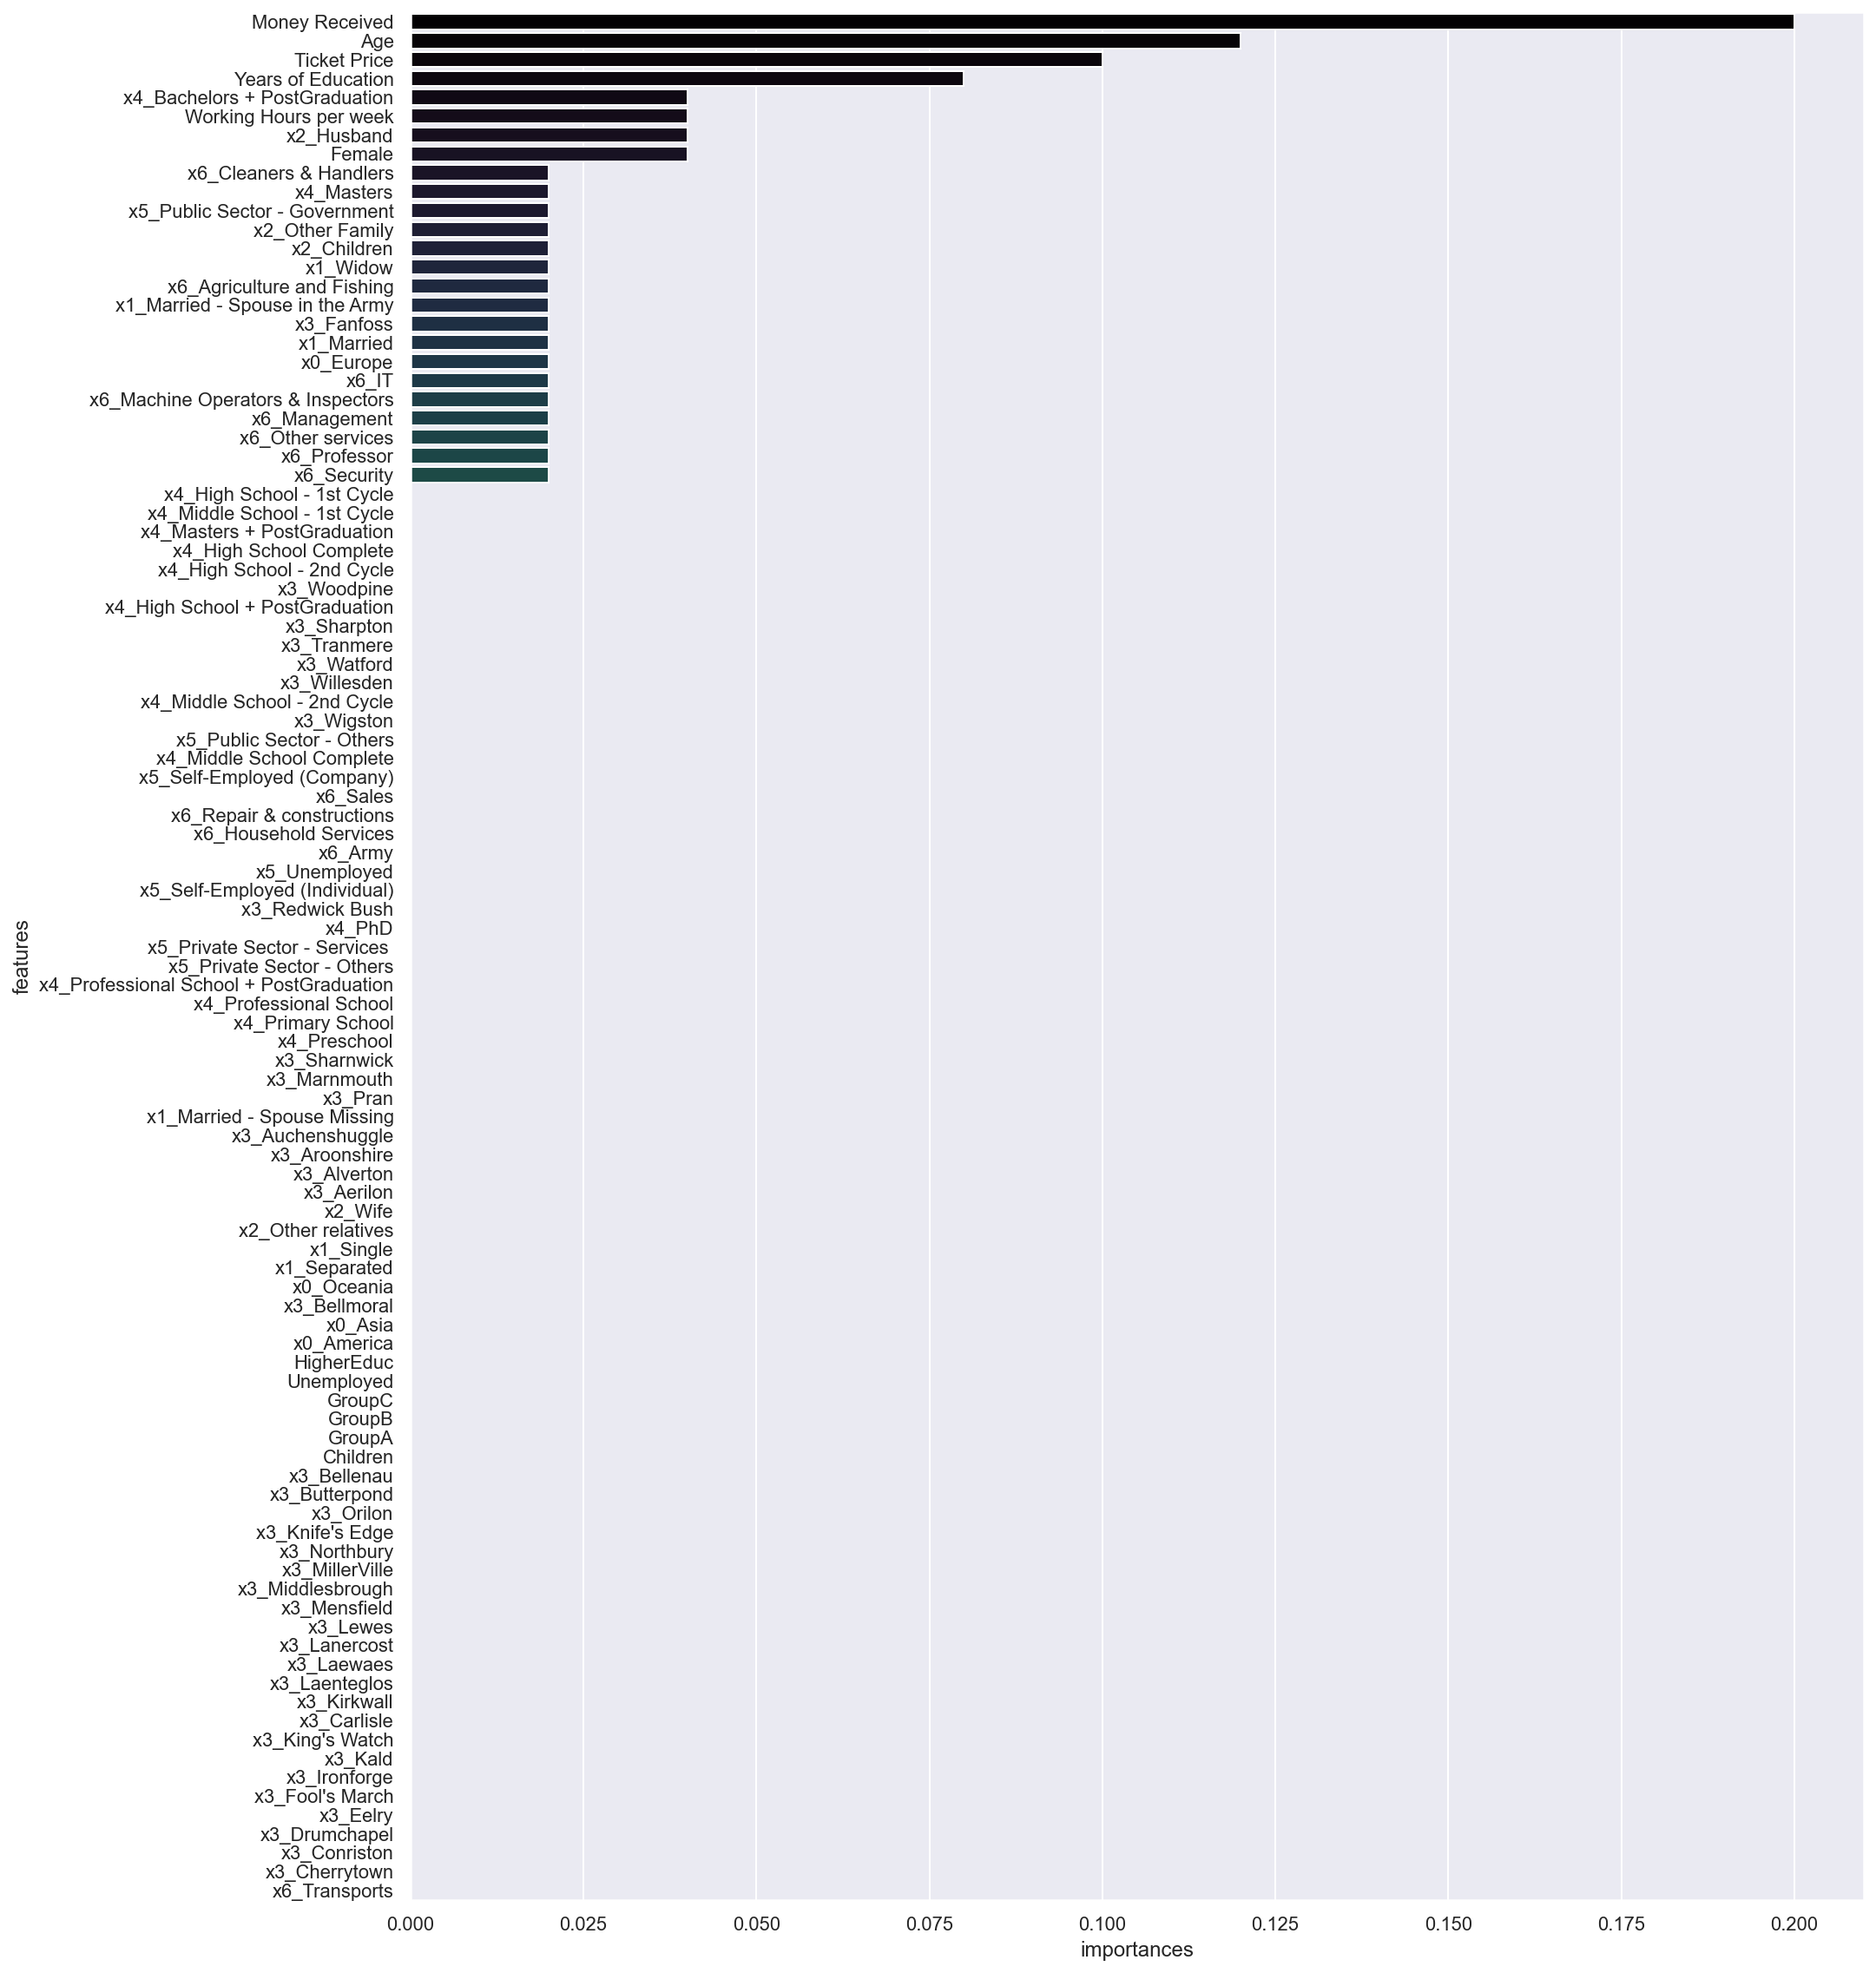

In [187]:
plt.figure(figsize=(15,20))
importances = ab.feature_importances_
features = data.columns
data_tuples = list(zip(importances, features))
data_1 = pd.DataFrame(data_tuples, columns = ['importances', 'features'])
data_1 = data_1.sort_values('importances', ascending = False)
sns.barplot(data_1['importances'], data_1['features'], palette = 'cubehelix', orient = 'h')

<hr>
<a class="anchor" id="selectedfeatures">
    
# 16. Final Selected Features
    
</a>

In [188]:
new_feature_variables=["x1_Married","Age","Years of Education","Money Received","Ticket Price","Working Hours per week",
                       'x6_Management', 'x2_Husband','x5_Public Sector - Others']

<a class="anchor" id="xy">

## 16.1. Split into X (Input variables) and y (Target)

</a>

In [189]:
# Assigning data and target to X and y, respectively
X = data[new_feature_variables]
y = target

In [190]:
y.value_counts()

0    17006
1     5280
Name: Income, dtype: int64

<hr>
<a class="anchor" id="resampling">
    
# 17. Re-Sampling Techniques for Imbalanced Classification
    
</a>

<a class="anchor" id="under">

## 17.1. Undersampling

</a>

In [191]:
from imblearn.under_sampling import RandomUnderSampler

In [192]:
from collections import Counter

In [193]:
# # define undersample strategy
#undersample = RandomUnderSampler(sampling_strategy='majority')
# # fit and apply the transform
#X_train, y_train = undersample.fit_resample(X_train, y_train)
# # summarize class distribution
#print(Counter(y_train))

<a class="anchor" id="over">

## 17.2. Oversampling

</a>

In [194]:
from imblearn.over_sampling import RandomOverSampler

In [195]:
# # define undersample strategy
#oversample = RandomOverSampler(sampling_strategy='minority')
# # fit and apply the transform
#X_train, y_train = oversample.fit_resample(X_train, y_train)
# # summarize class distribution
#print(Counter(y_train))

<a class="anchor" id="combined">

## 17.3. Undersampling & Oversampling (Combined)

</a>

In [196]:
# from numpy import mean
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.tree import DecisionTreeClassifier
# from imblearn.pipeline import Pipeline
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import RandomUnderSampler

In [197]:
# # define resampling
# over = RandomOverSampler(sampling_strategy=0.1)
# under = RandomUnderSampler(sampling_strategy=0.5)
# pipeline = Pipeline(steps=[('o', over), ('u', under)])
# X_train, y_train = pipeline.fit_resample(X_train, y_train)

<a class="anchor" id="smote">

## 17.4. SMOTE - Synthetic Minority Oversampling Technique

</a>

In [198]:
# from numpy import mean
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.tree import DecisionTreeClassifier
# from imblearn.pipeline import Pipeline
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler

In [199]:
# # define pipeline
#over = SMOTE(sampling_strategy=0.1)
#under = RandomUnderSampler(sampling_strategy=0.5)
#steps = [('o', over), ('u', under)]
#pipeline = Pipeline(steps=steps)
#X_train, y_train = pipeline.fit_resample(X_train, y_train)

<a class="anchor" id="adasyn">

## 17.5. ADASYN - Adaptive Synthetic Oversampling

</a>

**Adaptive Syntetic Oversampling** offers an improvement from SMOTE, since it considers the density distribution instead of consider only uniform weights as in SMOTE. This is good in terms of variance as it increases a little bit more than in SMOTE.

In [200]:
# from imblearn.over_sampling import ADASYN

In [201]:
# # define pipeline
# adasyn = ADASYN(sampling_strategy='minority', random_state=15, n_neighbors=5)
# X_train, y_train = adasyn.fit_resample(X_train, y_train)

In [202]:
# y_train.value_counts()

<hr>
<a class="anchor" id="traintestsplit">
    
# 18. Train Test Split
    
</a>

In [203]:
# TRAIN (70%) & VALIDATION (30%) SPLIT
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

In [204]:
y_train.value_counts()

0    11904
1     3696
Name: Income, dtype: int64

<hr>
<a class="anchor" id="models">
    
# 19. Models
    
</a>

<a class="anchor" id="kfoldrkfold">

## 19.1. K-Fold and Repeated K-Fold parameters

</a>

In [205]:
kf = KFold(n_splits=10)

In [206]:
rkf = RepeatedKFold(n_splits=10, n_repeats=2)

<a class="anchor" id="nn">

## 19.2. Multi-Layer Perceptron

</a>

<hr>
<a class="anchor" id="gridsearchnn">

### 19.2.1. Grid Search NN
    
</a>

In [207]:
# mlp = MLPClassifier()

In [208]:
# parameter_space = {
#     'hidden_layer_sizes': [(10,10), (10,10,10), (12,10,10), (10,12,10)],
#     'activation': ['tanh', 'relu', 'logistic'],
#     'solver': ['adam', 'lbfgs'],
#     'alpha': [0.0001, 0.001],
#     'learning_rate': ['adaptive', 'invscaling'],
# }

In [209]:
# clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
# clf.fit(X_train,y_train)
# clf.predict(X_train)
# clf.predict(X_val)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [210]:
# # Best parameter set
# print('Best parameters found:\n', clf.best_params_)

# print('---------------------------------------------------------------------------------------------------------------------')
# # All results
# means = clf.cv_results_['mean_test_score']
# stds = clf.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (10, 12, 10), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
---------------------------------------------------------------------------------------------------------------------
0.850 (+/-0.005) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.848 (+/-0.009) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
0.850 (+/-0.006) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'invscaling', 'solver': 'adam'}
0.845 (+/-0.006) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'invscaling', 'solver': 'lbfgs'}
0.850 (+/-0.005) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.848 (+/-0.005) for 

**TTS**

In [211]:
# def run_model_NN(X,y):
#     model=MLPClassifier(random_state=5,activation = 'logistic',alpha = 0.001 , hidden_layer_sizes=(10,10,10), learning_rate = 'adaptive', solver = 'lbfgs').fit(X,y)
#     return model

In [212]:
def evaluate_model(X,y, model):
    predictions = model.predict(X)
    return f1_score(y, predictions,average="micro")

In [213]:
# def TTS_score_NN(X_train,y_train, X_val, y_val):
#     model = run_model_NN(X_train, y_train)
#     value_train = evaluate_model(X_train, y_train, model)
#     value_val = evaluate_model(X_val,y_val, model)
#     print('Train:', value_train)
#     print('Val:', value_val)

In [214]:
# TTS_NN=TTS_score_NN(X_train,y_train, X_val, y_val)
# TTS_NN

Train: 0.8564102564102564
Val: 0.8544720311097818


In [215]:
#model=MLPClassifier(random_state=5,activation = 'logistic',alpha = 0.001 , hidden_layer_sizes=(10,10,10), learning_rate = 'adaptive', solver = 'lbfgs')

In [216]:
# model=model.fit(X_train,y_train) 

In [217]:
# labels_train = model.predict(X_train)

In [218]:
# labels_val = model.predict(X_val)

In [219]:
# print('Confusion matrix of the validation set:')
# print(confusion_matrix(y_true=y_val,y_pred=labels_val))

Confusion matrix of the validation set:
[[4812  290]
 [ 683  901]]


In [220]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

In [221]:
# metrics(y_train, labels_train , y_val,  labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11904
           1       0.76      0.57      0.65      3696

    accuracy                           0.86     15600
   macro avg       0.82      0.76      0.78     15600
weighted avg       0.85      0.86      0.85     15600

[[11235   669]
 [ 1571  2125]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [222]:
#TTS_NN=model.score(X_val,y_val)

**KF**

In [223]:
# def avg_score_NN(method,X,y):
#     score_train = []
#     score_test = []
#     for train_index, test_index in method.split(X):
#         X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#         y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#         model = run_model_NN(X_train, y_train)
#         value_train = evaluate_model(X_train, y_train, model)
#         value_test = evaluate_model(X_test,y_test, model)
#         score_train.append(value_train)
#         score_test.append(value_test)

#     print('Train:', np.mean(score_train))
#     print('Test:', np.mean(score_test))

In [224]:
# KF_NN=avg_score_NN(kf,X,y)
# KF_NN

Train: 0.8559584051740305
Test: 0.8541241694877304


**RKF**

In [225]:
# RKF_NN=avg_score_NN(rkf,X,y) #gotten with n_repeats = 2
# RKF_NN

Train: 0.8556742204599234
Test: 0.8531143152970515


<a class="anchor" id="rf">

## 19.3. Random Forest

</a>

**TTS**

In [226]:
# RANDOM_STATE = 5

# ensemble_clfs = [
#     ("RandomForestClassifier, max_features='sqrt'",
#         RandomForestClassifier(oob_score=True,
#                                max_features="sqrt",
#                                random_state=RANDOM_STATE)),
#     ("RandomForestClassifier, max_features='log2'",
#         RandomForestClassifier(max_features='log2',
#                                oob_score=True,
#                                random_state=RANDOM_STATE)),
#     ("RandomForestClassifier, max_features=None",
#         RandomForestClassifier(max_features=None,
#                                oob_score=True,
#                                random_state=RANDOM_STATE))
# ]

In [227]:
# from collections import OrderedDict

# # Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
# error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# # Range of `n_estimators` values to explore.
# min_estimators = 15
# max_estimators = 175

# for label, clf in ensemble_clfs:
#     for i in range(min_estimators, max_estimators + 1):
#         clf.set_params(n_estimators=i)
#         clf.fit(X_train, y_train)

#         # Record the OOB error for each `n_estimators=i` setting.
#         oob_error = 1 - clf.oob_score_
#         error_rate[label].append((i, oob_error))

In [228]:
# # Generate the "OOB error rate" vs. "n_estimators" plot.
# for label, clf_err in error_rate.items():
#     xs, ys = zip(*clf_err)
#     plt.plot(xs, ys, label=label)

# plt.xlim(min_estimators, max_estimators)
# plt.xlabel("n_estimators")
# plt.ylabel("OOB error rate")
# plt.legend(loc="upper right")
# plt.show()

In [229]:
# def run_model_RF(X,y):
#     model=RandomForestClassifier(n_estimators=150, criterion="gini", max_features=None, random_state=5, max_depth=8).fit(X,y)
#     return model

In [230]:
# def TTS_score_RF(X_train, y_train, X_val, y_val):
#     model = run_model_RF(X_train, y_train)
#     value_train = evaluate_model(X_train, y_train, model)
#     value_val = evaluate_model(X_val,y_val, model)
#     print('Train:', value_train)
#     print('Val:', value_val)

In [231]:
# TTS_RF=TTS_score_RF(X_train, y_train, X_val, y_val)
# TTS_RF

Train: 0.8645512820512821
Val: 0.8591085851032008


In [232]:
# rf = RandomForestClassifier(n_estimators=150, criterion="gini", max_features='sqrt', random_state=5, max_depth=8)

In [233]:
# # Train the model on training data
# rf=rf.fit(X_train, y_train)

In [234]:
# rf_labels_train = rf.predict(X_train)
# accuracy_score(y_train, rf_labels_train)

0.8653205128205128

In [235]:
# rf_labels_val = rf.predict(X_val)
# accuracy_score(y_val, rf_labels_val)

0.8598564163924619

In [236]:
# metrics(y_train, rf_labels_train, y_val, rf_labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     11904
           1       0.81      0.56      0.66      3696

    accuracy                           0.87     15600
   macro avg       0.84      0.76      0.79     15600
weighted avg       0.86      0.87      0.86     15600

[[11428   476]
 [ 1625  2071]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [237]:
# RF=rf.score(X_val,y_val)
# RF

0.8598564163924619

**KF**

In [238]:
# def avg_score_RF(method,X,y):
#     score_train = []
#     score_test = []
#     for train_index, test_index in method.split(X):
#         X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#         y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#         model = run_model_RF(X_train, y_train)
#         value_train = evaluate_model(X_train, y_train, model)
#         value_test = evaluate_model(X_test,y_test, model)
#         score_train.append(value_train)
#         score_test.append(value_test)

#     print('Train:', np.mean(score_train))
#     print('Test:', np.mean(score_test))

In [239]:
# KF_RF=avg_score_RF(kf,X,y)
# KF_RF

Train: 0.8646285275617396
Test: 0.8575345756484017


**RKF**

In [240]:
# RKF_RF=avg_score_RF(rkf,X,y) #gotten with n_repeats = 2 
# RKF_RF

Train: 0.8647830696673419
Test: 0.8580500188070908


<a class="anchor" id="log">

## 19.4. Logistic Regression

</a>

In [241]:
# log_model = LogisticRegression(random_state=5)

In [242]:
# log_model.fit(X_train,y_train)

LogisticRegression(random_state=5)

In [243]:
# y_pred_train=log_model.predict(X_train)
# y_pred = log_model.predict(X_val)
# y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [244]:
# pred_prob = log_model.predict_proba(X_val)
# pred_prob

array([[0.96398338, 0.03601662],
       [0.77546131, 0.22453869],
       [0.94880073, 0.05119927],
       ...,
       [0.65769128, 0.34230872],
       [0.92461106, 0.07538894],
       [0.43483101, 0.56516899]])

In [245]:
# log_model.coef_

array([[ 2.24989091,  0.38206598,  0.8374025 ,  2.26383467,  0.26088317,
         0.43271818,  0.73519938,  0.56814488, -0.0187571 ]])

In [246]:
# cm = confusion_matrix(y_val, y_pred)
# cm

array([[4786,  316],
       [ 692,  892]], dtype=int64)

In [247]:
# log_model.score(X_train,y_train)

0.8446153846153847

In [248]:
# metrics(y_train, y_pred_train, y_val, y_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11904
           1       0.72      0.56      0.63      3696

    accuracy                           0.84     15600
   macro avg       0.80      0.75      0.77     15600
weighted avg       0.84      0.84      0.84     15600

[[11119   785]
 [ 1639  2057]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [249]:
# LOG=log_model.score(X_val,y_val)
# LOG

0.8492372120849536

In [250]:
# def run_model_LR(X,y):
#     model = LogisticRegression(random_state=5).fit(X,y)
#     return model

In [251]:
# def evaluate_model(X,y, model):
#     predictions = model.predict(X)
#     return f1_score(y, predictions,average="micro")

In [252]:
# def avg_score_LR(method,X,y):
#     score_train = []
#     score_test = []
#     for train_index, test_index in method.split(X):
#         X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#         y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#         model = run_model_LR(X_train, y_train)
#         value_train = evaluate_model(X_train, y_train, model)
#         value_test = evaluate_model(X_test,y_test, model)
#         score_train.append(value_train)
#         score_test.append(value_test)

#     print('Train:', np.mean(score_train))
#     print('Test:', np.mean(score_test))

In [253]:
# KF_LOG=avg_score_LR(kf, X, y)
# KF_LOG

Train: 0.8460667907113842
Test: 0.8459573413297701


<a class="anchor" id="ibl">

## 19.5. Instance Based Learning

</a>

In [254]:
# modelKNN = KNeighborsClassifier()

In [255]:
# modelKNN=modelKNN.fit(X = X_train, y = y_train)

In [256]:
# labels_train = modelKNN.predict(X_train)
# labels_val = modelKNN.predict(X_val)

In [257]:
# modelKNN.predict_proba(X_val)

array([[1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       ...,
       [0.6, 0.4],
       [0.8, 0.2],
       [0.2, 0.8]])

In [258]:
# metrics(y_train, labels_train, y_val, labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     11904
           1       0.77      0.68      0.72      3696

    accuracy                           0.88     15600
   macro avg       0.84      0.81      0.82     15600
weighted avg       0.87      0.88      0.87     15600

[[11156   748]
 [ 1191  2505]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [259]:
# KNN=modelKNN.score(X_val,y_val)

In [260]:
# def run_model_KNN(X,y):
#     model=KNeighborsClassifier().fit(X,y)
#     return model

In [261]:
# def evaluate_model(X,y, model):
#     predictions = model.predict(X)
#     return f1_score(y, predictions, average="micro")

In [262]:
# def avg_score_KNN(method,X,y):
#     score_train = []
#     score_test = []
#     for train_index, test_index in method.split(X):
#         X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#         y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#         model = run_model_KNN(X_train, y_train)
#         value_train = evaluate_model(X_train, y_train, model)
#         value_test = evaluate_model(X_test,y_test, model)
#         score_train.append(value_train)
#         score_test.append(value_test)

#     print('Train:', np.mean(score_train))
#     print('Test:', np.mean(score_test))

In [263]:
# KF_KNN=avg_score_KNN(kf, X, y)
# KF_KNN

Train: 0.874385533883731
Test: 0.8325407775584288


<a class="anchor" id="dt">

## 19.6. Decision Trees

</a>

In [264]:
# dt_gini = DecisionTreeClassifier(splitter = 'random',criterion = 'entropy',random_state=5)

In [265]:
# dt_gini=dt_gini.fit(X_train, y_train)

In [266]:
# y_pred_train=dt_gini.predict(X_train)
# y_pred = dt_gini.predict(X_val)
# y_pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [267]:
# y_pred_prob = dt_gini.predict_proba(X_val)
# y_pred_prob

array([[1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [0.5, 0.5],
       [0. , 1. ]])

In [268]:
# print('The defined three has a depth of ' + str(dt_gini.get_depth()) + ', ' + str(dt_gini.tree_.node_count) + 
#       ' nodes and a total of ' + str(dt_gini.get_n_leaves()) + ' leaves.')

The defined three has a depth of 33, 6797 nodes and a total of 3399 leaves.


In [269]:
# metrics(y_train, y_pred_train, y_val, y_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     11904
           1       0.94      0.78      0.85      3696

    accuracy                           0.94     15600
   macro avg       0.94      0.88      0.91     15600
weighted avg       0.94      0.94      0.93     15600

[[11729   175]
 [  807  2889]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [270]:
# DT=dt_gini.score(X_val,y_val)

In [271]:
# def run_model_DT(X,y):
#     model=DecisionTreeClassifier(splitter = 'random',criterion = 'entropy',random_state=5).fit(X,y)
#     return model

In [272]:
# def evaluate_model(X,y, model):
#     predictions = model.predict(X)
#     return f1_score(y, predictions, average="micro")

In [273]:
# def avg_score_DT(method,X,y):
#     score_train = []
#     score_test = []
#     for train_index, test_index in method.split(X):
#         X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#         y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#         model = run_model_DT(X_train, y_train)
#         value_train = evaluate_model(X_train, y_train, model)
#         value_test = evaluate_model(X_test,y_test, model)
#         score_train.append(value_train)
#         score_test.append(value_test)

#     print('Train:', np.mean(score_train))
#     print('Test:', np.mean(score_test))

In [274]:
# KF_DT=avg_score_DT(kf, X, y)
# KF_DT

Train: 0.9334609778225387
Test: 0.8238802531990176


<a class="anchor" id="nb">

## 19.7. Naive Bayes

</a>

In [275]:
# nb = GaussianNB().fit(X_train, y_train)

In [276]:
# labels_train_nb = nb.predict(X_train)
# accuracy_score(y_train, labels_train_nb)

0.8098076923076923

In [277]:
# labels_val_nb = nb.predict(X_val)
# accuracy_score(y_val, labels_val_nb)

0.813490876458271

In [278]:
# metrics(y_train, labels_train_nb, y_val, labels_val_nb)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     11904
           1       0.64      0.46      0.53      3696

    accuracy                           0.81     15600
   macro avg       0.74      0.69      0.71     15600
weighted avg       0.80      0.81      0.80     15600

[[10941   963]
 [ 2004  1692]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [279]:
# NB=nb.score(X_val,y_val)

<a class="anchor" id="svm">

## 19.8. Support Vector Machine - SVC (Classifier)

</a>

In [280]:
# modelSVM = SVC(kernel = 'rbf', gamma = 'auto',random_state=5, probability = True, C=50).fit(X_train, y_train)

In [281]:
# modelSVM.score(X_train, y_train)

0.8590384615384615

In [282]:
# SVM=modelSVM.score(X_val, y_val)
# SVM

0.8519294047262937

<a class="anchor" id="ridgeclassifier">

## 19.9. Ridge Classifier

</a>

In [283]:
# ridge = Ridge(random_state=5)
# ridge.fit(X_train,y_train)
# y_prob = ridge.predict(X_train)
# y_pred = np.asarray([np.argmax(line) for line in y_prob])
# yp_test = ridge.predict(X_val)
# test_preds = np.asarray([np.argmax(line) for line in yp_test])
# print(accuracy_score(y_train,y_pred))

0.7630769230769231


In [284]:
# RIDGE=accuracy_score(y_val,test_preds)
# RIDGE

0.76308704756207

<a class="anchor" id="ensemble">

## 19.10. Ensemble Methods

</a>

<a class="anchor" id="bagg">

### 19.10.1. Balanced Bagging Classifier

</a>

**TTS**

In [285]:
# def run_model_BNN(X,y):
#     NN = MLPClassifier(random_state=5,activation = 'logistic',alpha = 0.001 , hidden_layer_sizes=(10,10,10), learning_rate = 'adaptive', solver = 'lbfgs')
#     bagging_NN = BaggingClassifier(base_estimator = NN, n_estimators = 50, bootstrap = False, random_state = 5, n_jobs = -1).fit(X,y)
#     return bagging_NN

In [286]:
# def TTS_score_BNN(X_train, y_train, X_val, y_val):
#     model = run_model_BNN(X_train, y_train)
#     value_train = evaluate_model(X_train, y_train, model)
#     value_val = evaluate_model(X_val,y_val, model)
#     print('Train:', value_train)
#     print('Val:', value_val)

In [287]:
# TTS_score_BNN(X_train, y_train, X_val, y_val)

Train: 0.8562820512820513
Val: 0.8544720311097818


In [288]:
# # Bagging Classifier with NN
# NN = MLPClassifier(random_state=5,activation = 'logistic',alpha = 0.001 , hidden_layer_sizes=(10,10,10), learning_rate = 'adaptive', solver = 'lbfgs')
# bbc = BaggingClassifier(base_estimator = NN, n_estimators = 50, bootstrap = False, random_state = 5, n_jobs = -1).fit(X_train, y_train)

In [289]:
# labels_train_bbc = bbc.predict(X_train)
# accuracy_score(y_train, labels_train_bbc)

0.8562820512820513

In [290]:
# labels_val_bbc = bbc.predict(X_val)
# BAGG=accuracy_score(y_val, labels_val_bbc)
# BAGG

0.8544720311097816

In [291]:
# metrics(y_train, labels_train_bbc, y_val, labels_val_bbc)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11904
           1       0.76      0.58      0.66      3696

    accuracy                           0.86     15600
   macro avg       0.82      0.76      0.78     15600
weighted avg       0.85      0.86      0.85     15600

[[11226   678]
 [ 1564  2132]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

**KF**

In [292]:
#def avg_score_BNN(method,X,y):
#    score_train = []
#    score_test = []
#    for train_index, test_index in method.split(X):
#        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#        model = run_model_BNN(X_train, y_train)
#        value_train = evaluate_model(X_train, y_train, model)
#        value_test = evaluate_model(X_test,y_test, model)
#        score_train.append(value_train)
#        score_test.append(value_test)

#    print('Train:', np.mean(score_train))
#    print('Test:', np.mean(score_test))

In [293]:
#avg_score_BNN(kf,X,y)

**RKF**

In [294]:
#avg_score_BNN(rkf,X,y) #gotten with n_repeats = 2 

<a class="anchor" id="baggtrees">

### 19.10.1. Balanced Bagging Classifier + Trees

</a>

In [295]:
# tree = DecisionTreeClassifier(random_state=5)

In [296]:
# bagging_tree = BaggingClassifier(base_estimator = tree,n_estimators = 50, bootstrap = False, random_state = 5, n_jobs = -1)

In [297]:
# bagging_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=5),
                  bootstrap=False, n_estimators=50, n_jobs=-1, random_state=5)

In [298]:
# bagging_tree.score(X_train, y_train)

0.9370512820512821

In [299]:
# BAGG_TREE=bagging_tree.score(X_val, y_val)
# BAGG_TREE

0.8315883936583907

<a class="anchor" id="adaboostclassifier">

### 19.10.3. AdaBoost Classifier

</a>

In [300]:
# # from matplotlib.legend_handler import HandlerLine2D
# def calculate_f1(interval, x_train, x_test, y_train, y_test, parameter):
#     train_results = []
#     test_results = []
#     for value in interval:
#         if parameter == 'Number of estimators':
#             dt = AdaBoostClassifier(n_estimators = value, random_state = 5)
#         elif parameter == 'Learning Rate':
#             dt = AdaBoostClassifier(learning_rate = value, random_state = 5)
#         dt.fit(x_train, y_train)
#         train_results.append(f1_score(y_train,dt.predict(x_train), average="micro"))
#         test_results.append(f1_score(y_test,dt.predict(x_test), average="micro"))
#     value_train = train_results.index(max(train_results))
#     value_test = test_results.index(max(test_results))
#     print('The best train value is ',interval[value_train])
#     print('The best test value is ',interval[value_test])

#     fig = plt.figure(figsize = (16,10))
#     line1, = plt.plot(interval, train_results, '#515C60', label="Train F1", linewidth=3)
#     line2, = plt.plot(interval, test_results, '#C7DC1F', label="Test F1", linewidth=3)
#     plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
#     plt.ylabel("F1 score")
#     plt.xlabel(str(parameter))
#     plt.show()

In [301]:
# num_estimators = list(range(1,100))
# calculate_f1(num_estimators, X_train, X_val, y_train, y_val,'Number of estimators')

In [302]:
# learning_rate = list(np.linspace(0.1, 0.9, 9, endpoint=True))
# calculate_f1(learning_rate, X_train, X_val, y_train, y_val,'Learning Rate')

In [303]:
# ada = AdaBoostClassifier(n_estimators=90, random_state=5,learning_rate = 0.7000000000000001).fit(X_train, y_train)

In [304]:
# labels_train_ada = ada.predict(X_train)
# accuracy_score(y_train, labels_train_ada)

0.8571153846153846

In [305]:
# labels_val_ada = ada.predict(X_val)
# ADABOOST=accuracy_score(y_val, labels_val_ada)
# ADABOOST

0.8613520789709841

In [306]:
# metrics(y_train, labels_train_ada, y_val, labels_val_ada)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     11904
           1       0.76      0.57      0.66      3696

    accuracy                           0.86     15600
   macro avg       0.82      0.76      0.78     15600
weighted avg       0.85      0.86      0.85     15600

[[11251   653]
 [ 1576  2120]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

<a class="anchor" id="stacking">

### 19.10.4. Stacking Classifier

</a>

In [307]:
# estimators = [('rf', RandomForestClassifier(n_estimators=150, criterion="gini", max_features='sqrt', random_state=5, max_depth=8)),('nb', GaussianNB())]
# sc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()).fit(X_train, y_train)

In [308]:
# labels_train_stacking = sc.predict(X_train)
# labels_val_stacking = sc.predict(X_val)

In [309]:
# metrics(y_train,labels_train_stacking,y_val,labels_val_stacking)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     11904
           1       0.79      0.59      0.68      3696

    accuracy                           0.87     15600
   macro avg       0.84      0.77      0.80     15600
weighted avg       0.86      0.87      0.86     15600

[[11342   562]
 [ 1524  2172]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [310]:
# sc_score = sc.score(X_train, y_train)
# sc_score

0.8662820512820513

In [311]:
# STACKING = sc.score(X_val, y_val)
# STACKING

0.8598564163924619

<a class="anchor" id="voting">

### 19.10.5. Voting Classifier

</a>

In [312]:
# vot_hard = VotingClassifier(estimators = estimators, voting ='hard') 
# vot_hard=vot_hard.fit(X_train, y_train) 
# y_pred = vot_hard.predict(X_val) 

In [313]:
# score = accuracy_score(y_val, y_pred) 
# print("Hard Voting Score % d" % score) 

Hard Voting Score  0


In [314]:
# vot_hard.score(X_train,y_train)

0.8475

In [315]:
# HARD_VOTING=vot_hard.score(X_val,y_val)
# HARD_VOTING

0.8471432844750224

In [316]:
# vot_soft = VotingClassifier(estimators = estimators, voting ='soft') 
# vot_soft=vot_soft.fit(X_train, y_train) 
# y_pred = vot_soft.predict(X_val)

In [317]:
# score = accuracy_score(y_val, y_pred) 
# print("Soft Voting Score % d" % score) 

Soft Voting Score  0


In [318]:
# vot_soft.score(X_train,y_train)

0.8189102564102564

In [319]:
# SOFT_VOTING=vot_hard.score(X_val,y_val)
# SOFT_VOTING

0.8471432844750224

<a class="anchor" id="gradientboost">

### 19.10.6. Gradient Boosting Classifier

</a>

**Check the best** ***n_estimators*** **&** ***learning_rate***

In [320]:
from matplotlib.legend_handler import HandlerLine2D

def calculate_f1(interval, x_train, x_test, y_train, y_test, parameter):
    train_results = []
    test_results = []
    for value in interval:
        if parameter == 'Number of estimators':
            dt = GradientBoostingClassifier(n_estimators = value, random_state = 5)
        elif parameter == 'Learning Rate':
            dt = GradientBoostingClassifier(learning_rate = value, random_state = 5)
        dt.fit(x_train, y_train)
        train_results.append(f1_score(y_train,dt.predict(x_train),average="micro"))
        test_results.append(f1_score(y_test,dt.predict(x_test), average="micro"))
    value_train = train_results.index(max(train_results))
    value_test = test_results.index(max(test_results))
    print('The best train value is ',interval[value_train])
    print('The best test value is ',interval[value_test])

    fig = plt.figure(figsize = (16,10))
    line1, = plt.plot(interval, train_results, '#515C60', label="Train F1", linewidth=3)
    line2, = plt.plot(interval, test_results, '#C7DC1F', label="Test F1", linewidth=3)
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel("F1 score")
    plt.xlabel(str(parameter))
    plt.show()

The best train value is  295
The best test value is  182


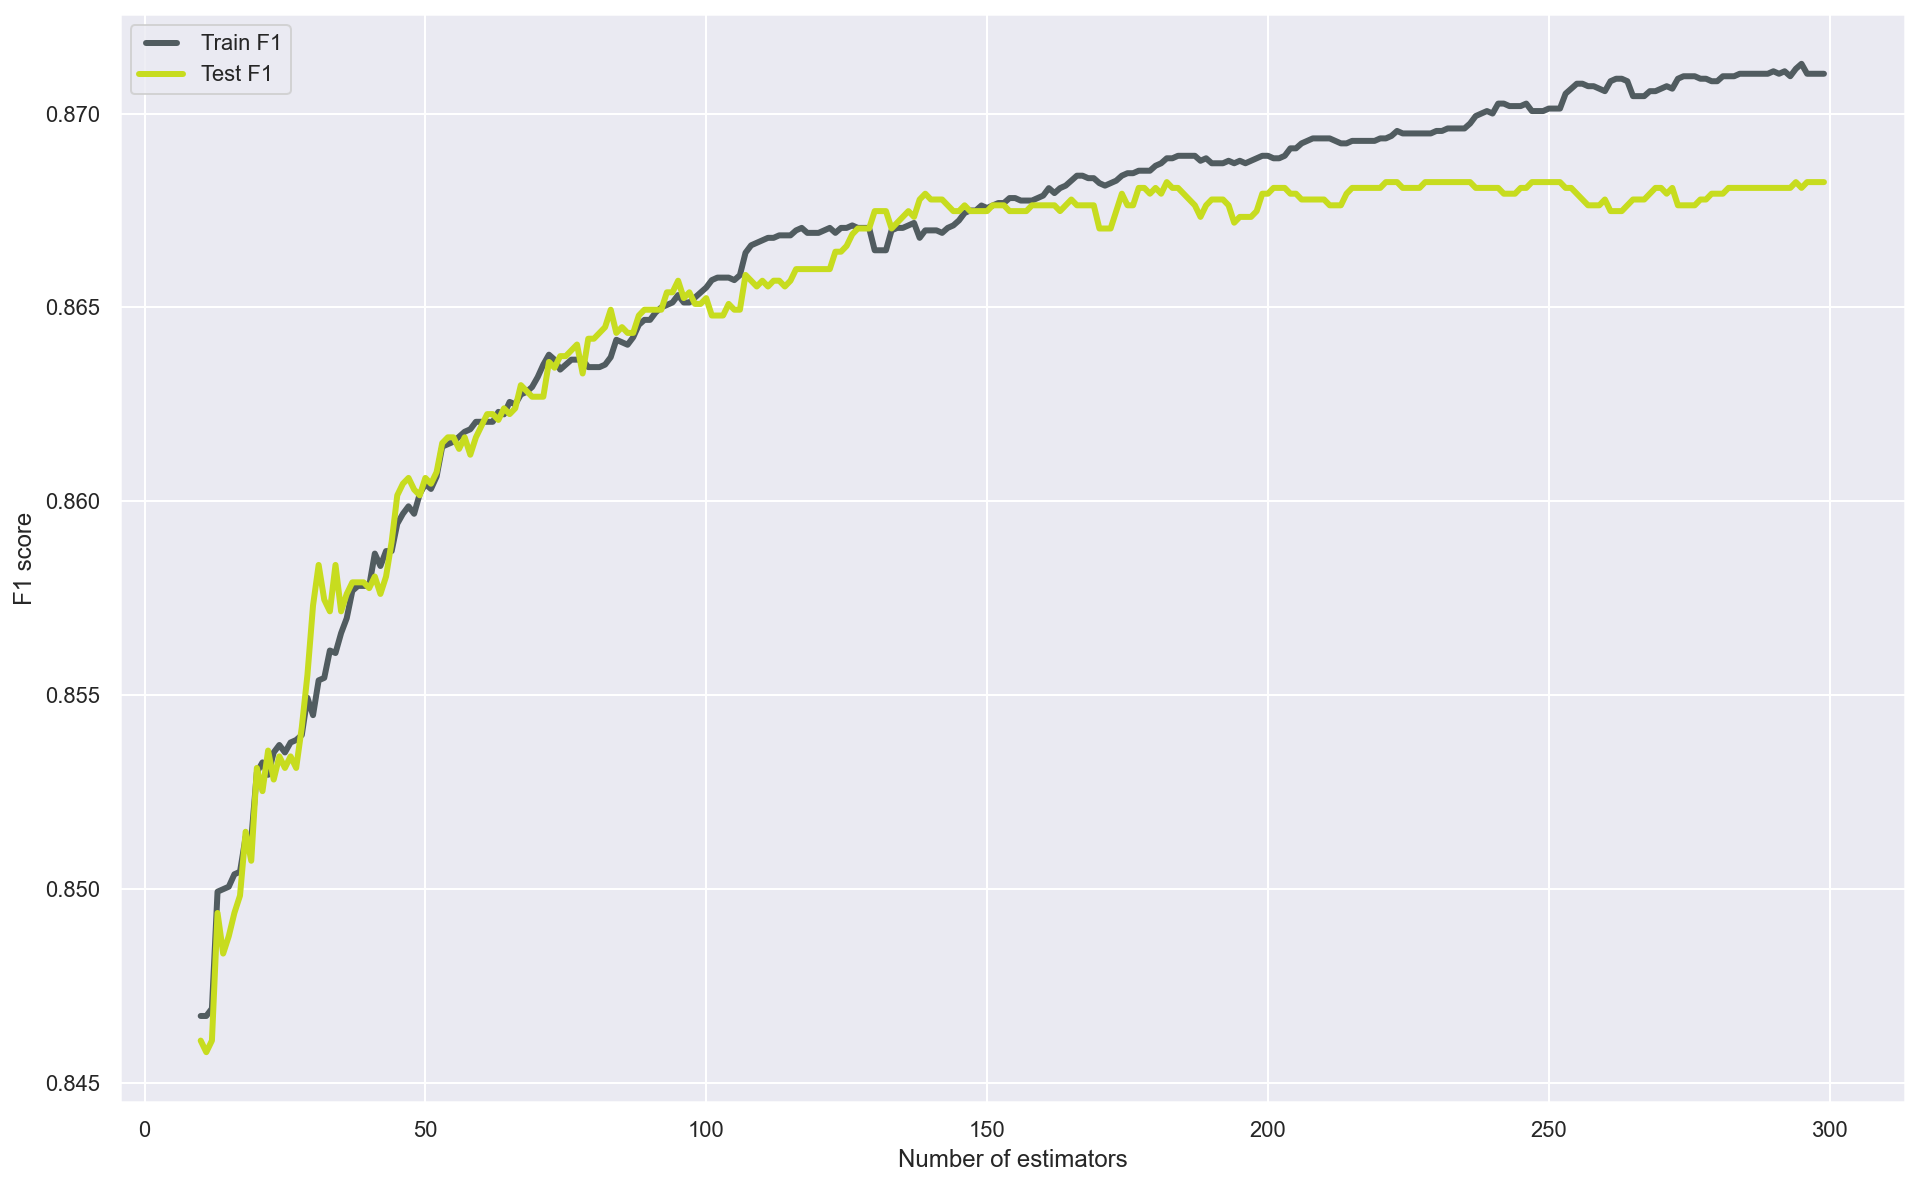

In [321]:
num_estimators = list(range(10,300))
calculate_f1(num_estimators, X_train, X_val, y_train, y_val,'Number of estimators')

The best train value is  0.9
The best test value is  0.30000000000000004


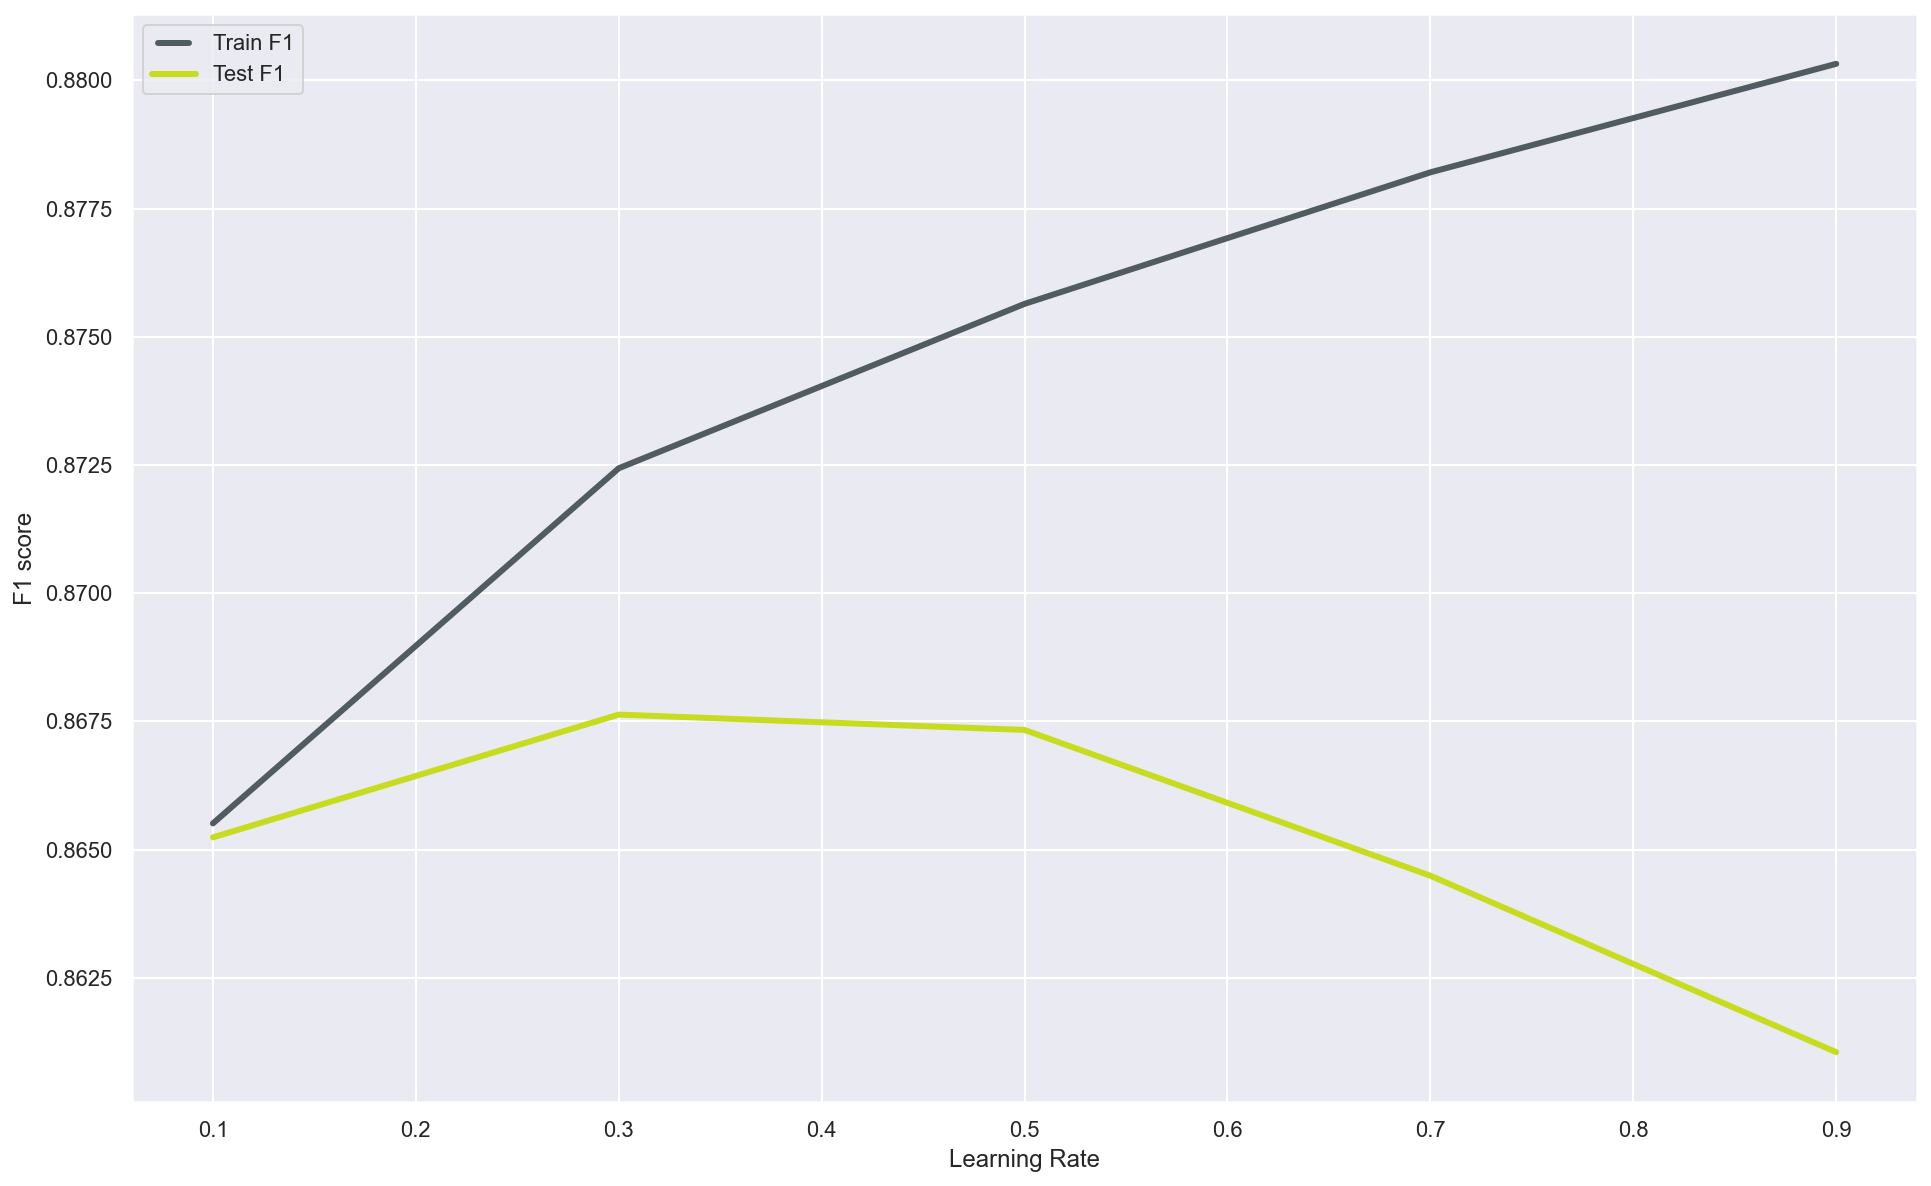

In [322]:
learning_rate = list(np.linspace(0.1, 0.9, 5, endpoint=True))
calculate_f1(learning_rate, X_train, X_val, y_train, y_val,'Learning Rate')

**TTS**

In [323]:
def run_model_GB(X,y):
    GB = GradientBoostingClassifier(min_samples_split=4,n_estimators = 182, random_state=0, loss = 'exponential', learning_rate=0.30000000000000004, max_features = 'log2').fit(X,y)
    return GB

In [324]:
def TTS_score_GB(X_train, y_train, X_val, y_val):
    model = run_model_GB(X_train, y_train)
    value_train = evaluate_model(X_train, y_train, model)
    value_val = evaluate_model(X_val,y_val, model)
    print('Train:', value_train)
    print('Val:', value_val)

In [325]:
TTS_score_GB(X_train, y_train, X_val, y_val)

Train: 0.8710897435897436
Val: 0.8680825605743344


In [326]:
GB = GradientBoostingClassifier(min_samples_split=4,n_estimators = 182, random_state=0, loss = 'exponential', learning_rate=0.30000000000000004, max_features = 'log2').fit(X_train, y_train)
GB.predict(X_train)
GB.predict(X_val)
GBC = GB.score(X_val, y_val)
GBC

0.8680825605743344

**KF**

In [327]:
#def avg_score_GB(method,X,y):
#    score_train = []
#    score_test = []
#    for train_index, test_index in method.split(X):
#        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#       model = run_model_GB(X_train, y_train)
#        value_train = evaluate_model(X_train, y_train, model)
#        value_test = evaluate_model(X_test,y_test, model)
#        score_train.append(value_train)
#        score_test.append(value_test)

#    print('Train:', np.mean(score_train))
#    print('Test:', np.mean(score_test))

In [328]:
#avg_score_GB(kf,X,y)

**RKF**

In [329]:
#avg_score_GB(rkf,X,y) #gotten with n_repeats = 2 

<hr>
<a class="anchor" id="modelscomparison">
    
# 20. Models Comparison
    
</a>

<a class="anchor" id="acc">

## 20.1. Accuracies

</a>

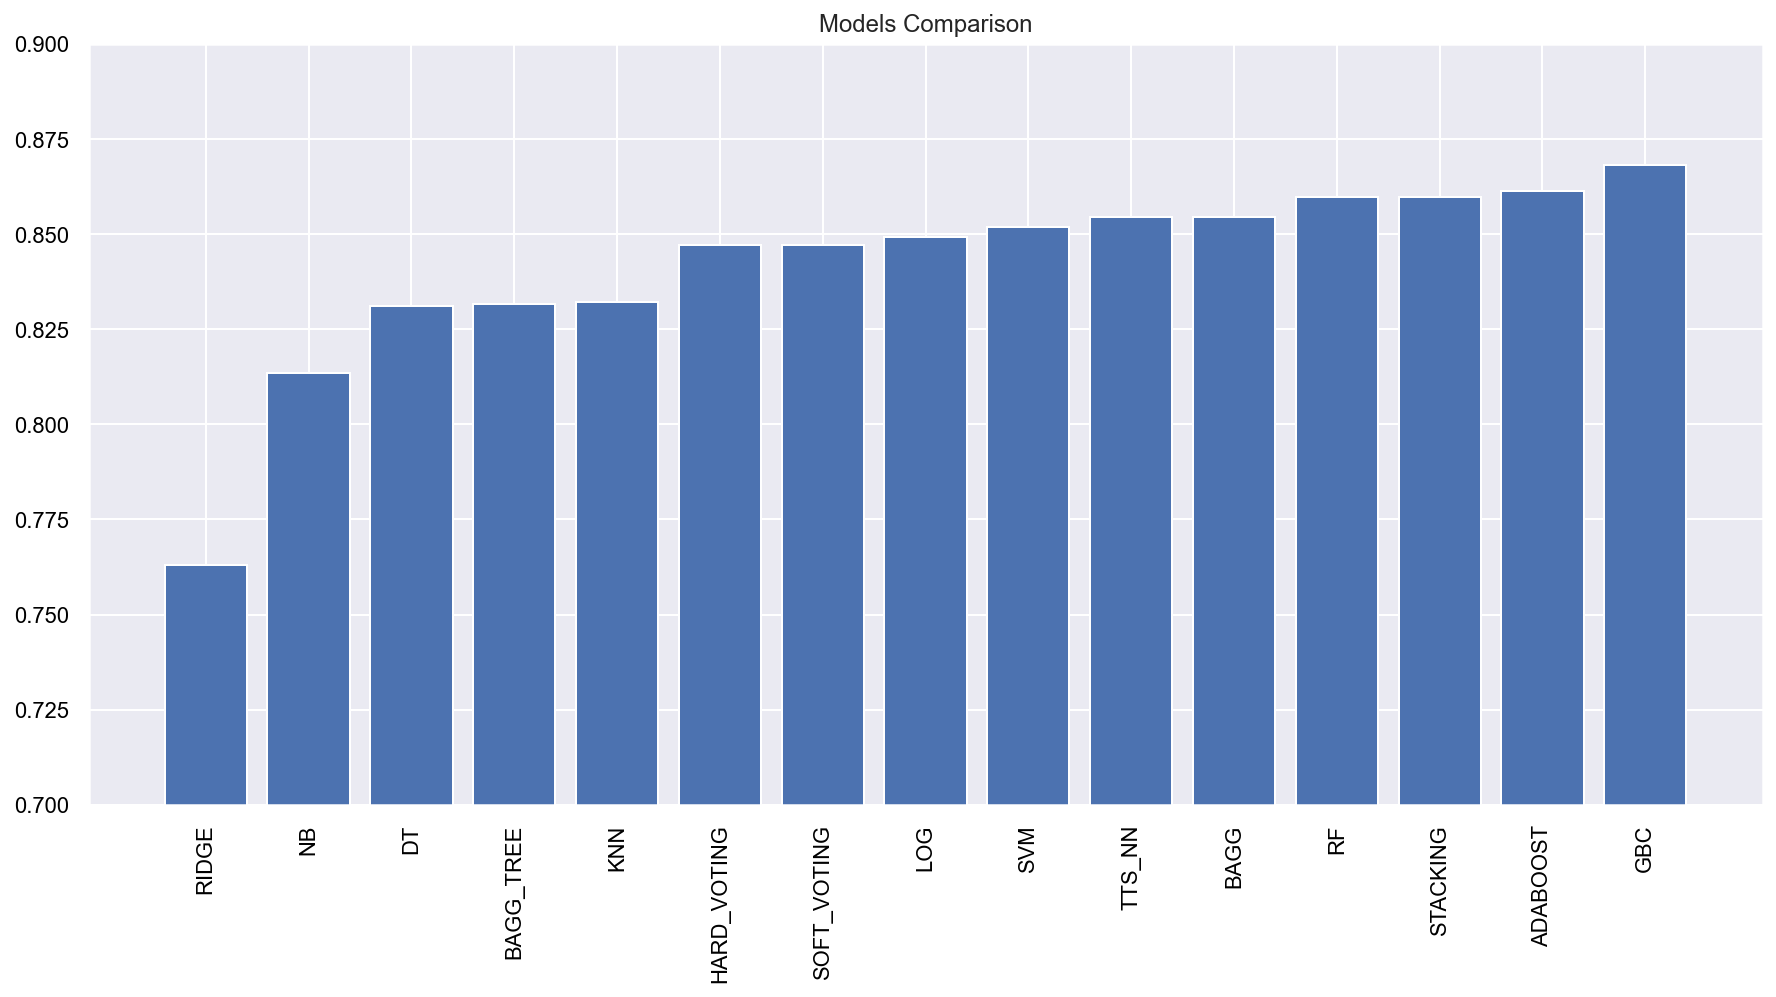

In [330]:
accuracies = [TTS_NN,LOG,KNN,DT,RF,NB,BAGG,BAGG_TREE,ADABOOST,STACKING,SVM,RIDGE,HARD_VOTING,
             SOFT_VOTING,GBC]
models = ["TTS_NN","LOG","KNN","DT","RF","NB","BAGG","BAGG_TREE",
          "ADABOOST","STACKING","SVM","RIDGE","HARD_VOTING","SOFT_VOTING","GBC"]
data_tuples = list(zip(models, accuracies))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.figure(figsize=(15,7))
plt.bar(data[0], data[1])
plt.xticks(rotation=90)
plt.xticks(color='black')
plt.yticks(color='black')
plt.ylim(0.7, 0.9)
plt.title('Models Comparison')
plt.show()

<a class="anchor" id="roc">

## 20.2. ROC Curve

</a>

In [331]:
tts_nn=MLPClassifier(activation = 'logistic',alpha = 0.001 , hidden_layer_sizes=(10,10,10), learning_rate = 'adaptive', solver = 'lbfgs',random_state=5).fit(X_train,y_train)
log_reg=LogisticRegression(random_state=5).fit(X_train,y_train)
knn= KNeighborsClassifier().fit(X_train,y_train)
dt=DecisionTreeClassifier(splitter = 'random',criterion = 'entropy',random_state=5).fit(X_train,y_train)
rf=RandomForestClassifier(n_estimators=150, criterion="gini", max_features='sqrt', random_state=5, max_depth=8).fit(X_train,y_train)
nb=GaussianNB().fit(X_train, y_train)
NN = MLPClassifier(random_state=5,activation = 'logistic',alpha = 0.001 , hidden_layer_sizes=(10,10,10), learning_rate = 'adaptive', solver = 'lbfgs')
bbc = BaggingClassifier(base_estimator = NN, n_estimators = 50, bootstrap = False, random_state = 5, n_jobs = -1).fit(X_train, y_train)
tree=DecisionTreeClassifier()
bagg_tree=BaggingClassifier(base_estimator = tree,n_estimators = 50, bootstrap = False, random_state = 5, n_jobs = -1).fit(X_train,y_train)
adaboost=AdaBoostClassifier(n_estimators=90, random_state=5,learning_rate = 0.7000000000000001).fit(X_train,y_train)
estimators = [('rf', RandomForestClassifier(n_estimators=150, criterion="gini", max_features='sqrt', random_state=5, max_depth=8)),('nb', GaussianNB())]
sc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()).fit(X_train, y_train)
svm = SVC(kernel = 'rbf', gamma = 'auto',random_state=5, probability = True, C=50).fit(X_train, y_train)
gbc = GradientBoostingClassifier(min_samples_split=4,n_estimators = 182, random_state=0, loss = 'exponential', learning_rate=0.30000000000000004, max_features = 'log2').fit(X_train, y_train)


In [333]:
from sklearn import metrics

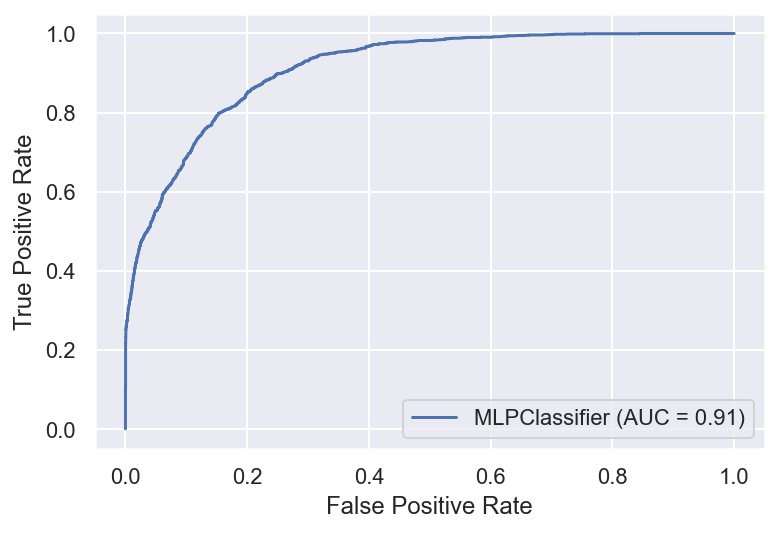

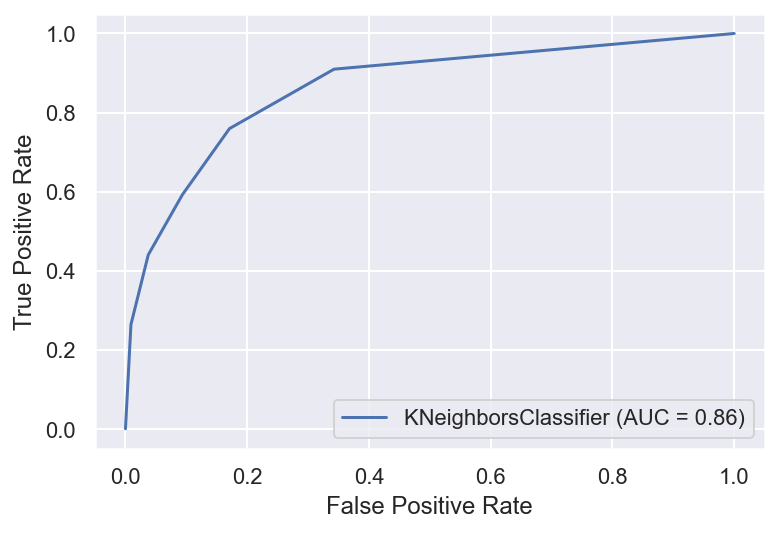

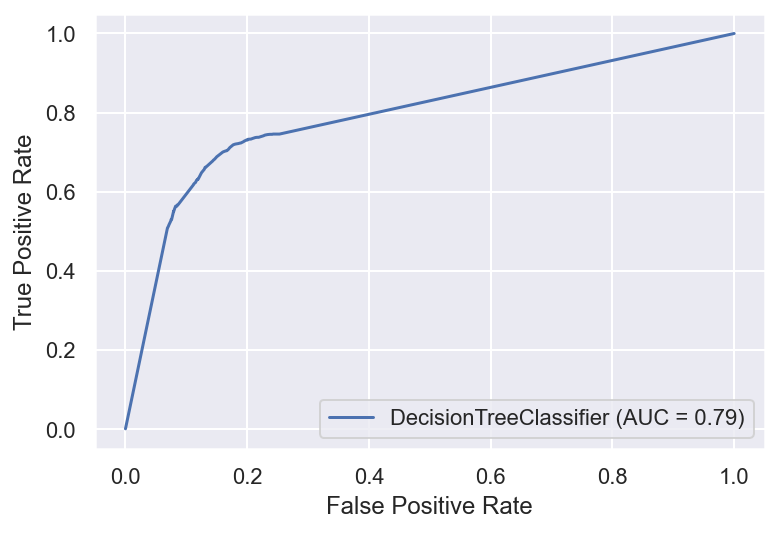

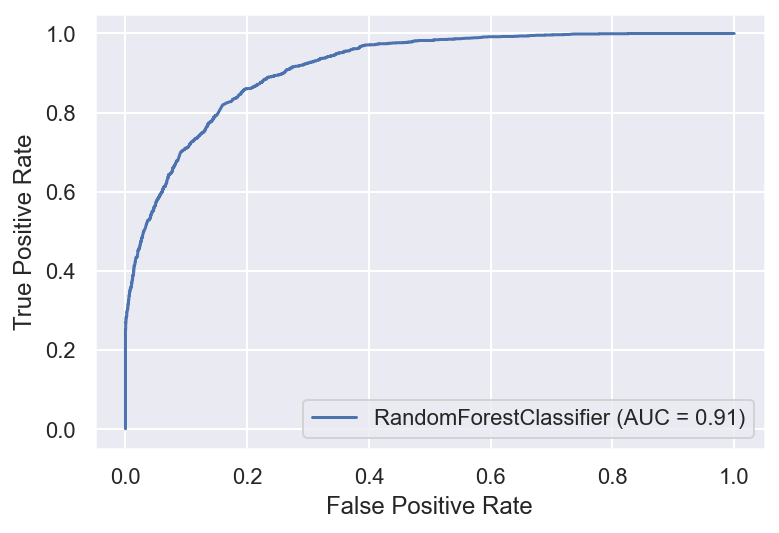

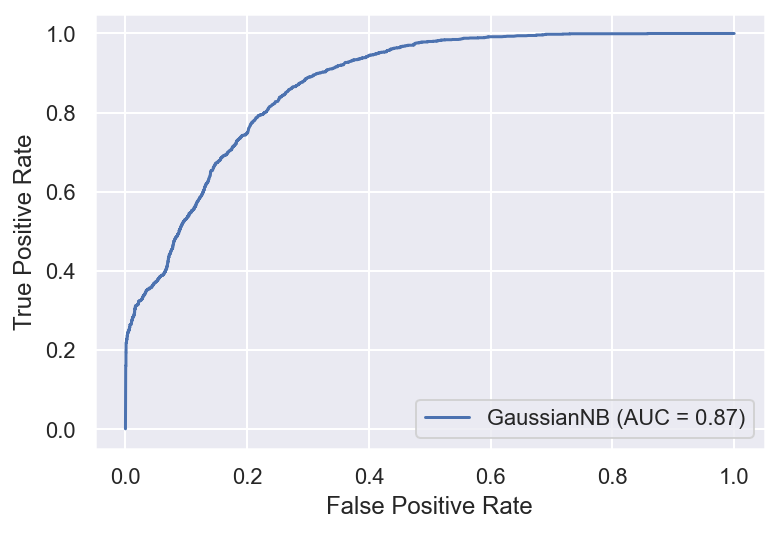

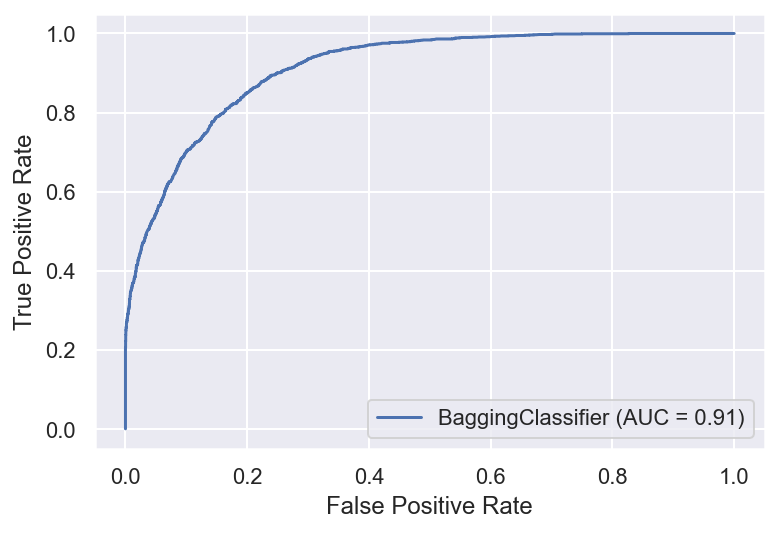

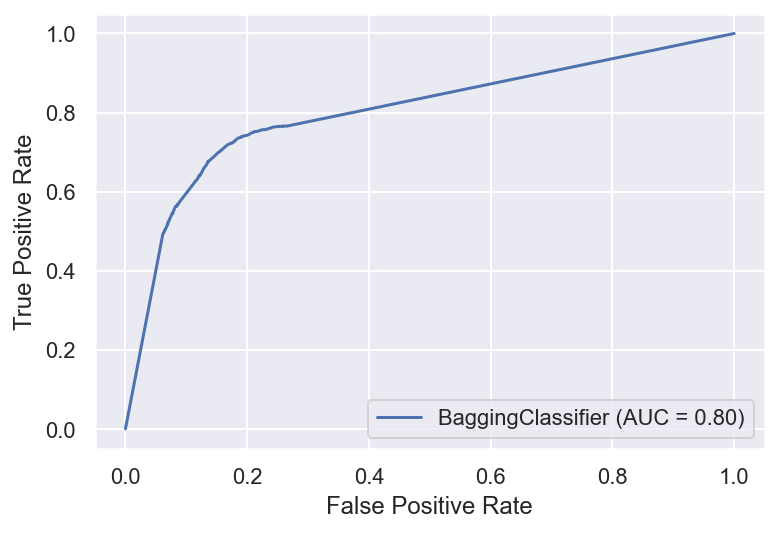

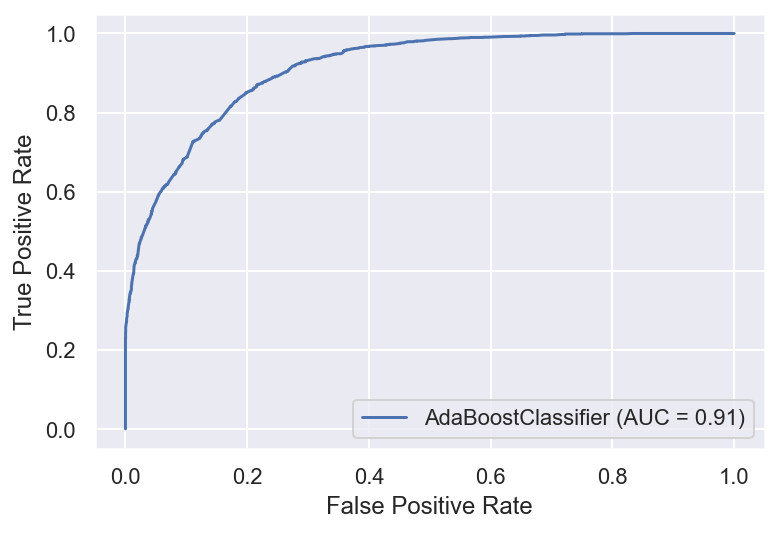

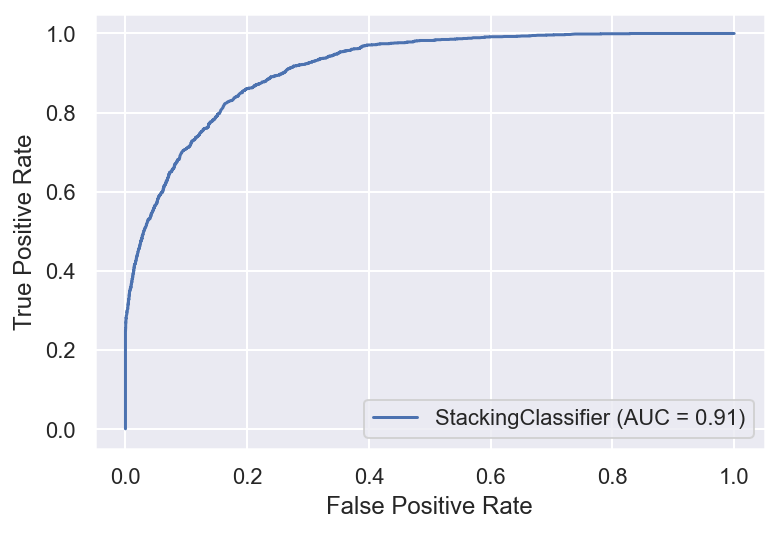

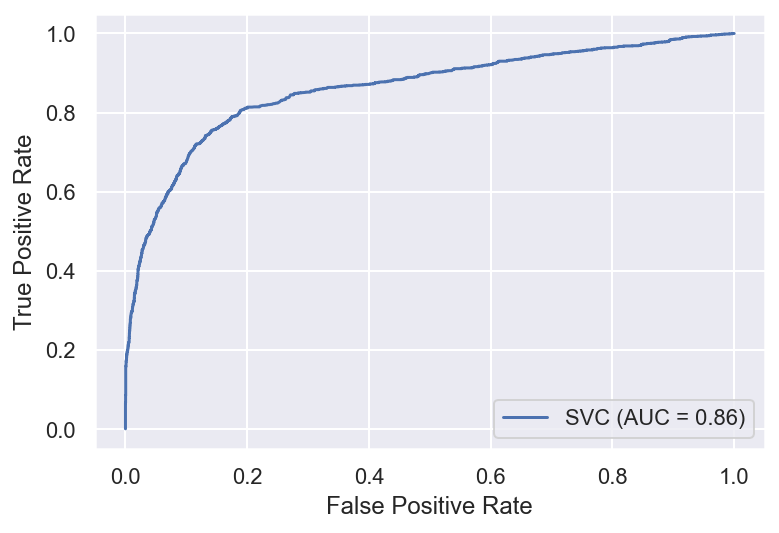

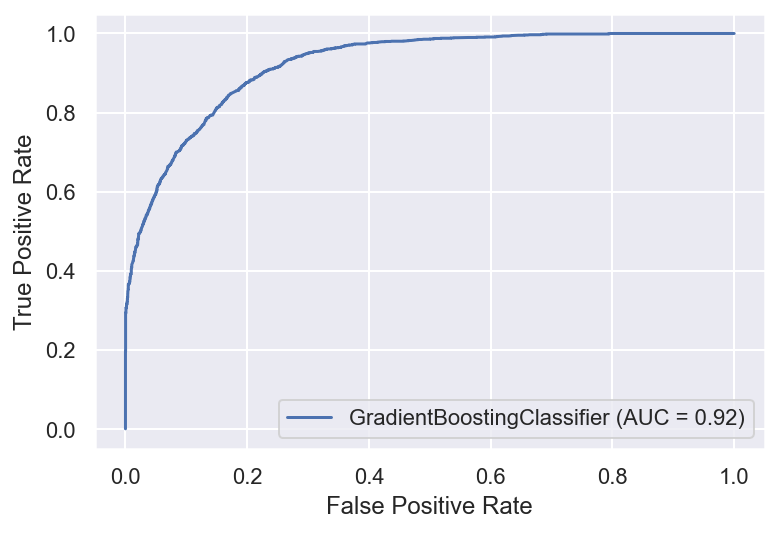

In [334]:
metrics.plot_roc_curve(tts_nn, X_val, y_val) 
metrics.plot_roc_curve(knn, X_val, y_val) 
metrics.plot_roc_curve(dt, X_val, y_val) 
metrics.plot_roc_curve(rf, X_val, y_val) 
metrics.plot_roc_curve(nb, X_val, y_val) 
metrics.plot_roc_curve(bbc, X_val, y_val) 
metrics.plot_roc_curve(bagg_tree, X_val, y_val) 
metrics.plot_roc_curve(adaboost, X_val, y_val) 
metrics.plot_roc_curve(sc, X_val, y_val) 
metrics.plot_roc_curve(svm, X_val, y_val) 
metrics.plot_roc_curve(gbc, X_val, y_val)  
plt.show() 

In [335]:
classifiers = [MLPClassifier(random_state=5,activation = 'logistic',alpha = 0.001 , hidden_layer_sizes=(10,10,10), learning_rate = 'adaptive', solver = 'lbfgs'), 
               LogisticRegression(random_state=5), 
               KNeighborsClassifier(), 
               DecisionTreeClassifier(random_state=5,splitter = 'random',criterion = 'entropy'),
               RandomForestClassifier(n_estimators=150, criterion="gini", max_features='sqrt', random_state=5, max_depth=8),
               GaussianNB(),
               BaggingClassifier(base_estimator = NN, n_estimators = 50, bootstrap = False, random_state = 5, n_jobs = -1),
               BaggingClassifier(base_estimator = tree,n_estimators = 50, bootstrap = False, random_state = 5, n_jobs = -1),
               AdaBoostClassifier(n_estimators=90, random_state=5,learning_rate = 0.7000000000000001),
               StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()),
               SVC(kernel = 'rbf', gamma = 'auto',random_state=15, probability = True, C=50),
               GradientBoostingClassifier(min_samples_split=4,n_estimators = 182, random_state=0, loss = 'exponential', learning_rate=0.30000000000000004, max_features = 'log2')]

In [336]:
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [337]:
# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_val)[::,1]
    
    fpr, tpr, _ = roc_curve(y_val,  yproba)
    auc = roc_auc_score(y_val, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)


In [338]:
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [339]:
result_table

,fpr,tpr,auc
classifiers,,,
MLPClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00019600...","[0.0, 0.0006313131313131314, 0.006313131313131...",0.911258
LogisticRegression,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0006313131313131314, 0.003156565656565...",0.900972
KNeighborsClassifier,"[0.0, 0.00901607212857703, 0.03743629949039592...","[0.0, 0.2638888888888889, 0.44002525252525254,...",0.863459
DecisionTreeClassifier,"[0.0, 0.06899255194041552, 0.06938455507644062...","[0.0, 0.5082070707070707, 0.5088383838383839, ...",0.793875
RandomForestClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0006313131313131314, 0.004419191919191...",0.914186
GaussianNB,"[0.0, 0.0001960015680125441, 0.000196001568012...","[0.0, 0.10858585858585859, 0.10921717171717171...",0.872515
BaggingClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0006313131313131314, 0.034722222222222...",0.912182
BaggingClassifier,"[0.0, 0.06115248921991376, 0.06115248921991376...","[0.0, 0.49053030303030304, 0.4917929292929293,...",0.803085
AdaBoostClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0012626262626262627, 0.003787878787878...",0.912274


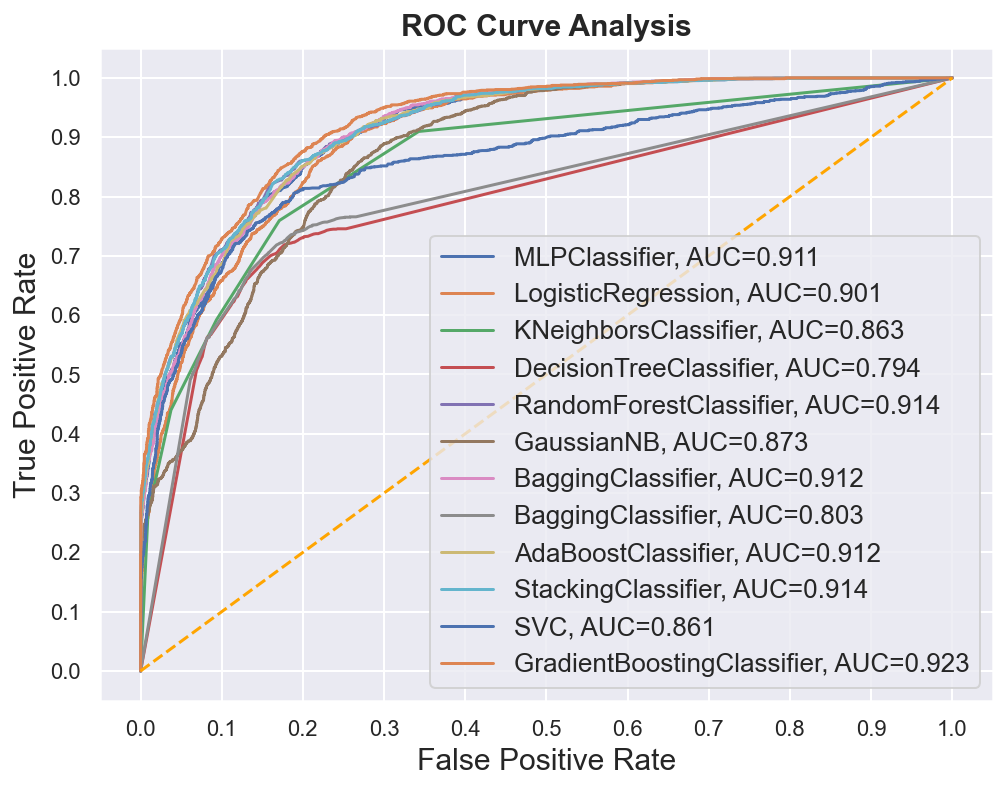

In [340]:
fig = plt.figure(figsize=(8,6))

for i in range(0,12):
    plt.plot(result_table.iloc[i]['fpr'], 
             result_table.iloc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(result_table.index[i], result_table.iloc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

<hr>
<a class="anchor" id="kaggle">
    
# 21. Final Model - Kaggle Submission
    
</a>

In [341]:
# model = GradientBoostingClassifier(min_samples_split=4,n_estimators = 182, random_state=0, loss = 'exponential', learning_rate=0.30000000000000004, max_features = 'log2').fit(X_train, y_train)
# Labels_Test = model.predict(c_ya_test_copy[new_feature_variables])
# Labels_Test = pd.DataFrame(Labels_Test)

In [342]:
# Labels_Test = model.predict(c_ya_test_copy[new_feature_variables])
# Labels_Test = pd.DataFrame(Labels_Test)

In [343]:
# Kaggle_sub = pd.DataFrame(c_ya_test_copy.index)
# Kaggle_sub

,CITIZEN_ID
0,34886
1,34887
2,34888
3,34889
4,34890
...,...
10095,44981
10096,44982
10097,44983
10098,44984


In [344]:
# Kaggle_sub = pd.concat([Kaggle_sub["CITIZEN_ID"], Labels_Test[0]],axis=1)
# Kaggle_sub["Income"] = Kaggle_sub[0]
# Kaggle_sub = Kaggle_sub.drop(columns=[0])

In [345]:
# Kaggle_sub.groupby("Income").count()["CITIZEN_ID"]

Income
0    8228
1    1872
Name: CITIZEN_ID, dtype: int64

In [346]:
# Kaggle_sub.set_index("CITIZEN_ID",inplace=True,drop=True)